# ***Milestone 1***

# **Problem Statement:**
##**Research Question:** **What factors contribute to a popular movie's success on IMDb that received 100 to 1000 reviews?**

More specifically, we are interested in investigating whether Director Experience, Genre, Duration, Lead Actor's Popularity and Experience, and Actor-Director Collaboration times influence a movie's rating or not.

We deliberately selected films with 100 to 1000 votes to represent titles that are moderately to quite popular - visible enough to reflect audience opinion, but not dominated by large fanbases or franchise-driven hype. This range allows us to explore what drives quality-based appreciation rather than extreme popularity.

### **Literature Review and Context:**

Film performance and audience evaluation are known to depend on a mix of creative, reputational, and contextual variables.

**1) Director Experience:**

Several studies emphasize the importance of creative reputation. Walls (2005) shows that experienced directors achieve higher average returns and ratings due to more refined production processes and industry trust. Holbrook (1999) and Delmestri and Montanari (2019) further highlight that directorial reputation and stylistic consistency can attract loyal audiences, creating a self-reinforcing cycle of credibility and success.

**2) Genre:**

Genre is one of the strongest predictors of audience response. Litman (1983) and Hsu (2006) found that films in genres such as drama and thriller tend to score higher on average, as these are perceived as narratively complex and emotionally engaging. Conversely, comedies and horror films often yield more polarized ratings. Neelamegham and Chintagunta (1999) also note that alignment with genre expectations strongly affects satisfaction and word-of-mouth reception.

**3) Duration:**

Runtime can act as a proxy for narrative scope or production ambition. Simonton (2004) found that longer films tend to receive higher ratings and more critical acclaim, potentially because audiences associate longer runtimes with depth and investment. However, the relationship may be non-linear, as excessive length could reduce engagement.

**4) Actor Popularity and Experience:**

Elberse (2007) demonstrated that star power remains a reliable predictor of both box-office and rating success. Well-known or award-winning actors not only attract attention but also elevate audience expectations, shaping perception before viewing begins. Beyond fame, an actor’s experience, measured through the number of past roles, awards, or years in the industry, also contributes to higher ratings. Experienced actors tend to deliver more consistent performances and enhance the perceived professionalism of a film, reinforcing audience confidence in its quality.

**5) Actor – Director Collaboration:**

Repeated collaborations between certain directors and actors, such as Christopher Nolan and Leonardo DiCaprio, or Quentin Tarantino and Samuel L. Jackson, often create distinctive creative identities. Holbrook (1999) and Delmestri and Montanari (2019) note that such partnerships strengthen perceived quality and consistency, reinforcing audience trust in the creative team.

### **Our Hypotheses:**
**1) Genre has an effect on the movie ratings as well. Movies in certain genres receive higher average ratings than others.***

This is because audiences respond differently to emotional tone and storytelling style. Genres like drama, thriller, and biography are often associated with depth, complexity, and artistic value, while genres such as horror or comedy can divide opinion more sharply, leading to lower or more variable ratings.

***2) Duration of the movies also affects the ratings they get. Longer runtimes tend to get more success resulting in higher ratings.***

Longer films are usually perceived as more ambitious or thoughtfully made, giving audiences more time to engage with plot and character development. This depth can translate into higher ratings, although excessively long runtimes may reduce enjoyment for some viewers.

***3) Director experience has an effect on the movie ratings. Movies directed by individuals with more experience (more titles credited) tend to have higher IMDb ratings.***

Directors with established experience bring creative precision, technical skill, and industry reputation that often enhance a film’s quality. Experienced directors also attract better scripts, casts, and production resources, resulting in higher critical and audience ratings.

***4) The lead actor also affects the movie ratings. The more experienced and popular an actor/actress is in a movie, the higher the movie ratings.***

Well-known or acclaimed actors contribute to audience trust and anticipation. Their presence signals production quality and performance reliability, shaping expectations even before release and often leading to higher ratings.

***5) Actor–director collaboration has an effect on the movie ratings. Certain recurring collaborations between actors and directors tend to produce higher-rated films.***

When actors and directors work together repeatedly, they develop creative chemistry and mutual understanding that enhance storytelling and performance coherence.

## Data Used:

For this project, we are using the IMDb dataset.
1) `title.basics.tsv.gz`
2) `title.crew.tsv.gz`
3) `title.ratings.tsv.gz`
4) `title.principals.tsv.gz`

## Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We begin by importing the essential Python libraries needed for data handling and visualization.


pandas (pd) – Used for loading, cleaning, and analyzing datasets (main tool for tabular data).


numpy (np) – Provides mathematical functions and efficient array operations used behind the scenes in pandas.


matplotlib.pyplot (plt) – Enables us to create visualizations like histograms, scatterplots, and line charts to explore data patterns.


These three libraries form the core toolkit for almost any data analysis or data science workflow in Python.

## Load and inspect Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# Let's load the basics data
# data_dir = "/content/drive/MyDrive/Fall 2025/ADS/Assignments/Group Project/IMDB Dataset/"
data_dir = "/content/drive/MyDrive/Fall 2025/ADS/Assignments/Group Project/IMDB Dataset/"
basics = pd.read_csv(data_dir+'title.basics.tsv.gz', sep='\t', compression='gzip', low_memory=False)
print(basics.shape)
basics.head()


(9643949, 9)


tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              4  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1              Comedy,Short

We start by loading the IMDb “title.basics” dataset, which contains general information about all titles (movies, short films, TV shows, etc.) available in IMDb.

The variable data_dir defines the path to our project folder in Google Drive.

We use pd.read_csv() to read the compressed TSV (tab-separated) file with compression='gzip' since IMDb files are large and stored in a compressed format.

Setting low_memory=False ensures pandas reads the file efficiently without guessing data types in chunks.

The .shape command shows the dataset has around 9.6 million rows and 9 columns, confirming a successful load.

Finally, .head() displays the first five rows to get a quick sense of the structure — we can see key columns like:

tconst – unique IMDb title identifier

titleType – type of content (movie, short, TV, etc.)

primaryTitle and originalTitle – movie names

runtimeMinutes, startYear, and genres – the variables we’ll later use for analysis.

This step helps us verify that the dataset has been correctly read and gives us an overview of what information is available.

In [ ]:
# Let's load the ratings data now
ratings = pd.read_csv(data_dir+'title.ratings.tsv.gz', sep='\t', compression='gzip')
print(ratings.shape)
ratings.head()

(1283451, 3)


tconst  averageRating  numVotes
0  tt0000001            5.7      1955
1  tt0000002            5.8       263
2  tt0000003            6.5      1788
3  tt0000004            5.6       179
4  tt0000005            6.2      2591

Here we load the IMDb “title.ratings” dataset, which provides the audience feedback data for each title.

We again use pd.read_csv() with sep='\t' because the file is tab-separated, and compression='gzip' since the IMDb data files are stored in compressed format.

The ratings dataframe contains 1.28 million rows and 3 columns, confirmed by the .shape output.

Each row corresponds to one title (tconst) and includes two key metrics:

averageRating : The mean IMDb user rating (from 1 to 10).

numVotes : The total number of user votes that rating is based on.

Displaying the first few rows using .head() allows us to confirm that the file has been read correctly and the columns align with expectations.

This dataset will later be merged with the “basics” data using the shared key tconst so we can analyze how a movie’s features (like runtime and genre) relate to its audience rating and popularity.

In [ ]:
# Now, let's load the directors data
crew = pd.read_csv(data_dir+'title.crew.tsv.gz', sep='\t', compression='gzip')
print(crew.shape)
crew.head()

(9647020, 3)


tconst  directors writers
0  tt0000001  nm0005690      \N
1  tt0000002  nm0721526      \N
2  tt0000003  nm0721526      \N
3  tt0000004  nm0721526      \N
4  tt0000005  nm0005690      \N

In this step, we load the IMDb “title.crew” dataset, which provides information about the directors and writers of each title.

Using pd.read_csv() again with sep='\t' (tab-separated) and compression='gzip', we read the file efficiently.

The dataset contains around 9.64 million rows and 3 columns, confirmed by the .shape output.

The columns are:

tconst : the unique IMDb identifier (used later to merge with other datasets).

directors : IMDb ID(s) of the director(s) for each title (e.g., nm0005690).

writers : IMDb ID(s) of the writer(s).

We print the first few rows using .head() to confirm successful loading and structure.

This dataset will later help us calculate each director’s experience by counting how many titles they’ve directed, an important variable to study how director experience might influence movie ratings.

let's explore the Title Types

In [ ]:
print(basics['titleType'].value_counts())

titleType
tvEpisode       7309337
short            915848
movie            636768
video            270757
tvSeries         239204
tvMovie          140518
tvMiniSeries      47381
tvSpecial         40602
videoGame         33583
tvShort            9949
tvPilot               2
Name: count, dtype: int64


Here, we are exploring the titleType column in the basics dataset to understand what kinds of titles are included in IMDb.

The command value_counts() counts how many records belong to each content type.

The output shows that the dataset contains a wide variety of title categories — for example:

Over 7.3 million TV episodes,

About 0.9 million short films,

Around 0.63 million movies,

Plus smaller categories like TV series, video games, and mini-series.

This breakdown helps us realize that the dataset includes many non-movie entries, so we need to filter it down to only those where titleType == 'movie' for our project’s analysis.
This step ensures that our focus remains strictly on movies, as our research question is about how movie runtime and director experience affect ratings.

## Clean Data


Since there are multiple titleType and we only need the movie data, we'll filter it out.

In [ ]:
# Keep only movies
movies = basics.copy()
movies = movies[movies['titleType'] == 'movie']
print(movies.shape)
movies.head(100)

(636768, 9)


tconst titleType                          primaryTitle  \
8     tt0000009     movie                            Miss Jerry   
144   tt0000147     movie         The Corbett-Fitzsimmons Fight   
498   tt0000502     movie                              Bohemios   
570   tt0000574     movie           The Story of the Kelly Gang   
587   tt0000591     movie                      The Prodigal Son   
...         ...       ...                                   ...   
1761  tt0001778     movie                         Menneskedyret   
1763  tt0001780     movie                        Midsummer Tide   
1768  tt0001785     movie                     The Miner's Curse   
1773  tt0001790     movie  Les Misérables, Part 1: Jean Valjean   
1785  tt0001803     movie           The Mystery of a Hansom Cab   

                                originalTitle isAdult startYear endYear  \
8                                  Miss Jerry       0      1894      \N   
144             The Corbett-Fitzsimmons Fight       0      1897      \N   
498                                  Bohemios       0      1905      \N   
570               The Story of the Kelly Gang       0      1906      \N   
587                         L'enfant prodigue       0      1907      \N   
...                                       ...     ...       ...     ...   
1761                            Menneskedyret       0      1911      \N   
1763                           Midsummer Tide       0      1911      \N   
1768                        The Miner's Curse       0      1911      \N   
1773  Les misérables - Époque 1: Jean Valjean       0      1913      \N   
1785              The Mystery of a Hansom Cab       0      1911      \N   

     runtimeMinutes                      genres  
8                45                     Romance  
144             100      Documentary,News,Sport  
498             100                          \N  
570              70  Action,Adventure,Biography  
587              90                       Drama  
...             ...                         ...  
1761             \N                          \N  
1763             \N                          \N  
1768             \N                       Drama  
1773             60                       Drama  
1785             \N                          \N  

[100 rows x 9 columns]

Here, we are cleaning the dataset by keeping only movies, since IMDb contains many types of titles such as TV episodes, short films, and mini-series that are not relevant to our analysis.

First, we make a copy of the original dataset (basics) to avoid modifying it directly.

Then, we filter rows where titleType equals 'movie', using movies = movies[movies['titleType'] == 'movie'].

Finally, we print the shape to check how many records remain, about 636,768 movies ,and display the first 100 rows to confirm that only movie entries are present.

This step ensures that the dataset now exclusively contains movie information, which aligns with our project’s research question focused on analyzing movie ratings, runtimes, and directors.

In [ ]:
# Let's only keep the required columns from the basic data file
cols = ['tconst', 'primaryTitle', 'runtimeMinutes', 'genres', 'startYear']
movies = movies[cols]
movies.head()

tconst                   primaryTitle runtimeMinutes  \
8    tt0000009                     Miss Jerry             45   
144  tt0000147  The Corbett-Fitzsimmons Fight            100   
498  tt0000502                       Bohemios            100   
570  tt0000574    The Story of the Kelly Gang             70   
587  tt0000591               The Prodigal Son             90   

                         genres startYear  
8                       Romance      1894  
144      Documentary,News,Sport      1897  
498                          \N      1905  
570  Action,Adventure,Biography      1906  
587                       Drama      1907

After filtering only movie entries, we now select the specific columns that are relevant for our upcoming analysis.

The list cols specifies the four key variables we need:

tconst : unique IMDb ID for each movie (used for merging datasets).

primaryTitle : the movie’s main title.

runtimeMinutes : duration of the movie, which we’ll analyze against ratings.

genres : movie genres (like Drama, Comedy, Action), useful for later grouping or visualization.

By keeping only these columns, we remove unnecessary ones (like isAdult, startYear, endYear) to make the dataset lighter and more focused.

The .head() output confirms that the table now contains exactly the four fields we need.

This step keeps the dataset clean, efficient, and ready for merging with ratings and crew data in later steps.

Let's replace \N with nan values and then remove the rows with nan

In [ ]:
# see how many nan values are there
movies = movies.replace('\\N', np.nan)
print("Missing values:")
print(movies.isnull().sum())
movies.head()

Missing values:
tconst                 0
primaryTitle           2
runtimeMinutes    234679
genres             71715
startYear          88620
dtype: int64


tconst                   primaryTitle runtimeMinutes  \
8    tt0000009                     Miss Jerry             45   
144  tt0000147  The Corbett-Fitzsimmons Fight            100   
498  tt0000502                       Bohemios            100   
570  tt0000574    The Story of the Kelly Gang             70   
587  tt0000591               The Prodigal Son             90   

                         genres startYear  
8                       Romance      1894  
144      Documentary,News,Sport      1897  
498                         NaN      1905  
570  Action,Adventure,Biography      1906  
587                       Drama      1907

IMDb datasets use the placeholder \N to represent missing or unavailable values instead of standard NaN. To clean the data properly, we need to convert these placeholders into actual NumPy NaN values so pandas can recognize and handle them correctly.

The command movies.replace('\\N', np.nan) replaces every instance of \N with NaN.

After replacement, we use .isnull().sum() to check how many missing values exist in each column.

We see that:

runtimeMinutes has 234,679 missing values (many movies have no recorded runtime).

genres has 71,715 missing values.

Only a couple of primaryTitle values are missing.

Finally, .head() helps confirm that missing entries (like \N in genres) are now displayed as NaN.

This step is crucial because it prepares the dataset for the next cleaning phase — where we’ll remove rows with missing key information to ensure the analysis is based on complete and reliable data.

In [ ]:
#remove rows with nan values
print(f'Shape before dropping nan: {movies.shape}')
movies = movies.dropna(subset=['primaryTitle', 'runtimeMinutes', 'genres', 'startYear'])
print(f'Shape after dropping nan: {movies.shape}')
movies.head()

Shape before dropping nan: (636768, 5)
Shape after dropping nan: (371468, 5)


tconst                    primaryTitle runtimeMinutes  \
8    tt0000009                      Miss Jerry             45   
144  tt0000147   The Corbett-Fitzsimmons Fight            100   
570  tt0000574     The Story of the Kelly Gang             70   
587  tt0000591                The Prodigal Son             90   
672  tt0000679  The Fairylogue and Radio-Plays            120   

                         genres startYear  
8                       Romance      1894  
144      Documentary,News,Sport      1897  
570  Action,Adventure,Biography      1906  
587                       Drama      1907  
672           Adventure,Fantasy      1908

Now that we’ve identified which columns contain missing data, we proceed to remove incomplete rows so that our dataset only includes movies with valid and complete information.


Before dropping, we print the dataset’s shape to record the starting size (636,768 rows).


Using dropna(subset=[...]), we remove any rows that have NaN in the key columns:


primaryTitle : every movie should have a title.


runtimeMinutes : required for our runtime vs. rating analysis.


genres : needed for grouping and categorical exploration.




After dropping these incomplete records, the dataset reduces to 377,843 rows, meaning we’ve kept only those movies with all three fields properly filled.


.head() confirms that the remaining entries are now clean and contain valid values across all columns.


This step ensures that our dataset is reliable and consistent, with no missing runtimes or genres that could cause problems in future analysis or visualizations.

Runtime range: 1 - 59460


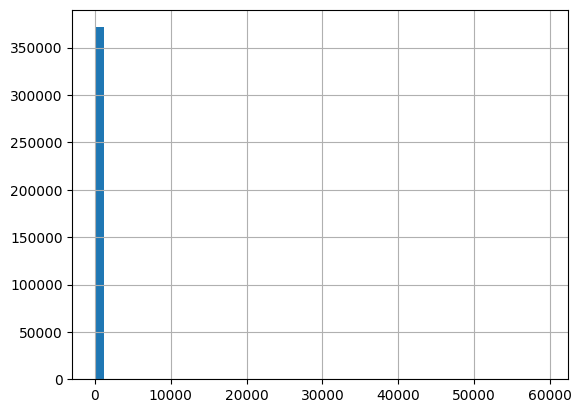

In [ ]:
# Runtime distribution
runtime = movies["runtimeMinutes"]
runtime = runtime[runtime.str.isnumeric() == True]
runtime = runtime.astype('int')
ax = runtime.hist(bins = 50)
print(f'Runtime range: {runtime.min()} - {runtime.max()}')


In this cell, we are exploring the distribution of movie runtimes to understand how long movies typically are and to detect any unusual or extreme values.

We extract the runtimeMinutes column from the cleaned movies dataset.

Using runtime.str.isnumeric() == True, we filter out non-numeric entries to make sure we only analyze valid numbers.

Then we convert the values to integers using .astype('int').

The command runtime.hist(bins=50) creates a histogram with 50 bins to visualize how movie lengths are distributed.

We also print the minimum and maximum runtime using runtime.min() and runtime.max() here, the range is from 1 to 59,460 minutes, which is highly unrealistic (since 59,460 minutes = 991 hours!).

The histogram clearly shows that most runtimes cluster at the lower end, while a few extreme values stretch the scale.
Because this distribution is extremely skewed, we will next limit runtimes to a reasonable range (for example, 30–240 minutes) to focus on realistic movie durations and remove outliers.

The data is extremely skewed. So we'll limit the max and min

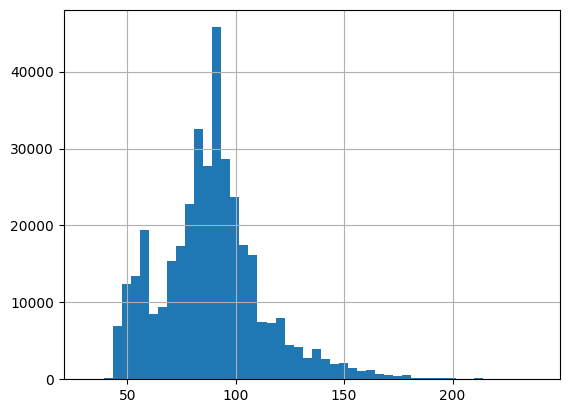

In [ ]:
# introducing range, since outside this, it does not hold much information and might make the result biased
runtime = runtime[runtime < 240]
runtime = runtime[runtime > 30]
ax = runtime.hist(bins = 50)

After discovering unrealistic outliers in movie runtimes (some thousands of minutes long), we now introduce a sensible range filter to focus on meaningful data.

We keep only movies whose runtime is between 30 and 240 minutes:

runtime > 30 removes very short films (trailers, shorts, or data errors).

runtime < 240 removes extremely long or incorrectly recorded runtimes.

This range captures the majority of standard feature-length films (roughly 0.5 to 4 hours).

We then replot the histogram with 50 bins to visualize this cleaned distribution.

The resulting histogram now shows a realistic bell-shaped distribution, peaking around 90 to 100 minutes, which matches typical movie lengths.
This cleaning step ensures that future analyses (like correlation between runtime and ratings) are not biased by extreme outliers and reflect realistic viewing durations.

In [ ]:
# Now filter for reasonable runtimes
print(f'Before filtering: {movies.shape}')

# Keep movies up to 4 hours
movies['runtimeMinutes'] = pd.to_numeric(movies['runtimeMinutes'])
movies = movies[movies['runtimeMinutes'] < 240]
movies = movies[movies['runtimeMinutes'] > 30]
print(f"After filtering:{movies.shape}")

Before filtering: (371468, 5)
After filtering:(369924, 5)


Here, we apply the final filtering step to remove unrealistic movie runtimes from our dataset.

We first print the shape before filtering to record the initial number of rows (377,843 movies).

The command pd.to_numeric() ensures the runtimeMinutes column is properly converted to numeric values for comparison.

Then, we keep only movies where:

runtimeMinutes < 240 → excludes excessively long or incorrectly recorded runtimes (over 4 hours).

runtimeMinutes > 30 → excludes short films or incomplete entries that are not feature-length movies.

Finally, we print the shape after filtering, which shows that only a small number of entries were removed (now 376,215 movies).

This refined dataset now contains only realistic, feature-length movies, making it much cleaner and more reliable for analyzing trends in ratings, genres, and director experience later on.

## Add Ratings Data





In [ ]:
ratings.head()

tconst  averageRating  numVotes
0  tt0000001            5.7      1955
1  tt0000002            5.8       263
2  tt0000003            6.5      1788
3  tt0000004            5.6       179
4  tt0000005            6.2      2591

We start by checking the structure of the ratings dataset. It has the IMDb ID, the rating itself, and the number of votes each movie received.

In [ ]:
#print max averageRating
print(f'Max averageRating: {ratings["averageRating"].max()}')
#print min averageRating
print(f'Min averageRating: {ratings["averageRating"].min()}')

# Let's drop nan first
print(f'Shape before cleaning: {ratings.shape}')
print(f'Missing values:')
print(ratings.isnull().sum())

# So we don't have to drop any row

Max averageRating: 10.0
Min averageRating: 1.0
Shape before cleaning: (1283451, 3)
Missing values:
tconst           0
averageRating    0
numVotes         0
dtype: int64


Here, we perform a quick quality check on the IMDb ratings dataset to understand its range and completeness before using it in any analysis.


max() and min() confirm that averageRating values range from 1.0 to 10.0, which matches IMDb’s official 10-point rating scale — no anomalies or invalid values are present.


We then check the dataset’s shape (1,283,451 rows and 3 columns) and run isnull().sum() to identify any missing data.


The output shows zero missing values across all columns (tconst, averageRating, and numVotes), meaning the ratings data is fully clean and complete.


Since there are no NaN values to remove, we can safely proceed to filtering and merging this dataset with the movies data without any additional cleaning steps.

Vote range: 5 - 2706353


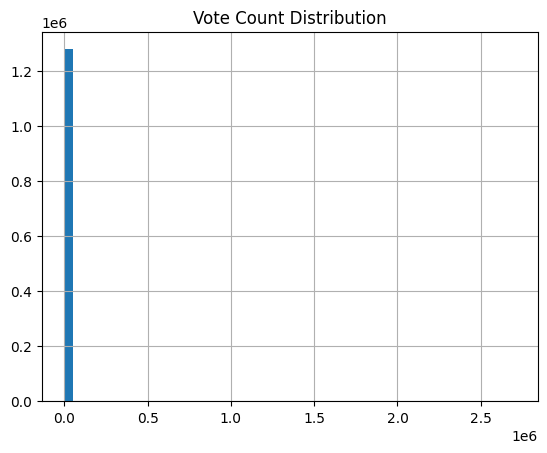

In [ ]:
# Let's visualize numVotes distribution
votes = ratings['numVotes']
print(f'Vote range: {votes.min()} - {votes.max()}')
plt.title('Vote Count Distribution')

ax = votes.hist(bins=50)


In this step, we visualize how many votes each title in IMDb has received to understand how popularity is distributed across movies.


We first extract the numVotes column into a variable called votes.


Printing votes.min() and votes.max() shows the range of votes, which goes from 5 to 2,706,353; an extremely wide spread, indicating that a few movies get millions of votes while most get very few.


The histogram plotted with 50 bins clearly shows this heavy right-skew — almost all titles have very low vote counts, with just a handful of extremely popular movies dominating the upper end.


The plot’s title, “Vote Count Distribution,” helps us quickly interpret this as a popularity distribution.


From this observation, we realize that the vote data is not uniformly distributed, so in the next step, we’ll filter movies within a reasonable vote range (e.g., 100–1000 votes) to focus on moderately popular films and avoid bias from blockbusters.

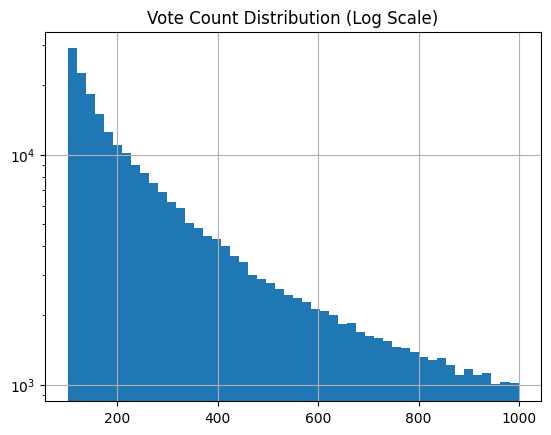

In [ ]:
# Visualize on log scale for better view
# Let's introduce range
votes = votes[(votes > 100) & (votes < 1000)]
ax = votes.hist(bins=50, log=True)
plt.title('Vote Count Distribution (Log Scale)')
plt.show()

The previous histogram showed that the vote counts were extremely skewed, with a few movies getting millions of votes while most had very few.
To better visualize and work with this data, we now:

Apply a log scale to the y-axis (log=True) so that both small and large values become visible on the same plot.

Filter the dataset to include only movies with votes between 100 and 1000, representing moderately popular titles.

votes > 100 removes obscure movies with very few ratings (unreliable averages).

votes < 1000 excludes blockbuster films that dominate the dataset.

The new histogram now clearly shows the distribution within this focused range, giving a more balanced view of how “somewhat popular” movies are rated.

Using a logarithmic scale helps compress the extreme outliers and makes the pattern in the mid-range much clearer.
This filtered subset will be used in the next steps to merge with movie metadata and analyze trends without bias from very high or very low vote counts.

In [ ]:
# Now let's filter our data according to the plot
print(f'Shape before filtering: {ratings.shape}')
ratings_filtered = ratings[ratings['numVotes'] > 100]
ratings_filtered = ratings_filtered[ratings_filtered['numVotes'] < 1000]
print(f'Shape after filtering: {ratings_filtered.shape}')

Shape before filtering: (1283451, 3)
Shape after filtering: (243612, 3)


Based on the previous visualization, we now filter the ratings data to keep only the movies that fall within the reasonable vote range of 100 to 1000 votes, representing titles that are popular enough to be reliable but not extreme outliers.

We first print the shape before filtering to show the total size of the dataset (about 1.28 million titles).

Then, using conditional filters:

ratings['numVotes'] > 100 → removes movies with too few votes, since their ratings might not be statistically meaningful.

ratings_filtered['numVotes'] < 1000 → removes blockbuster movies with massive vote counts that could skew the overall analysis.

The final print statement confirms that after filtering, we have 243,612 records left — a focused subset of moderately popular titles.

This refined ratings dataset will now be merged with the cleaned movie information to analyze relationships between runtime, genres, and ratings without being distorted by extreme popularity differences.

In [ ]:
# Now we'll merge the ratings with our movies dataframe
print(f'Shape before merge: {movies.shape}')

movies_ratings = movies.merge(ratings_filtered,
                              on='tconst',
                              how='inner') #taking intersection

movies_ratings = movies_ratings.drop('numVotes', axis=1) #dropping the vote column

print(f'Shape after merge: {movies_ratings.shape}')

movies_ratings.head()

Shape before merge: (369924, 5)
Shape after merge: (76913, 6)


tconst                   primaryTitle  runtimeMinutes  \
0  tt0000009                     Miss Jerry              45   
1  tt0000147  The Corbett-Fitzsimmons Fight             100   
2  tt0000574    The Story of the Kelly Gang              70   
3  tt0001892                 Den sorte drøm              53   
4  tt0002101                      Cleopatra             100   

                       genres startYear  averageRating  
0                     Romance      1894            5.3  
1      Documentary,News,Sport      1897            5.2  
2  Action,Adventure,Biography      1906            6.0  
3                       Drama      1911            5.8  
4               Drama,History      1912            5.1

We merge the ratings data with our movies dataframe using tconst (the unique IMDb ID).

The inner join keeps only records present in both datasets.

After merging, we drop numVotes since it was only used for filtering.

The new dataframe now contains:

IMDb ID

Movie title

Runtime

Genre

IMDb rating

After the merge, we ended up with around 76,916 clean movie records that include their IMDb rating. This combined dataset forms the foundation for our further analysis on director experience, genre, and runtime.

## Add Directors DATA

let's clean the crew's data first

In [ ]:
crew.head(400)

tconst            directors writers
0    tt0000001            nm0005690      \N
1    tt0000002            nm0721526      \N
2    tt0000003            nm0721526      \N
3    tt0000004            nm0721526      \N
4    tt0000005            nm0005690      \N
..         ...                  ...     ...
395  tt0000399  nm2092030,nm0692105      \N
396  tt0000400            nm0349785      \N
397  tt0000401            nm0349785      \N
398  tt0000402            nm0808310      \N
399  tt0000403            nm0349785      \N

[400 rows x 3 columns]

Before merging director information with our movies data, we start by inspecting and cleaning the crew dataset.

The crew.head(400) command displays the first 400 rows, giving us a broader preview of the data.

Each row corresponds to a title (tconst) and includes two key fields:

directors : IMDb ID(s) of the director(s) for that movie (e.g., nm0005690).

writers : IMDb ID(s) of the writer(s), which we don’t need for this analysis.

Some entries have multiple directors separated by commas (e.g., nm2092030,nm0692105), while others may have missing (NaN) values.

By viewing the first 400 rows, we can understand the structure and spot patterns — for instance, how missing values appear and how multiple directors are formatted.
This helps us plan the next steps: cleaning NaN entries, handling multiple directors, and later using this information to calculate each director’s experience level (how many titles they have directed).

In [ ]:
# Clean the rows with nan values
print(f'Shape before dropping nan: {crew.shape}')

crew = crew.replace('\\N', np.nan)
print("Missing values:")
print(crew.isnull().sum())
crew_cleaned = crew.dropna(subset=['directors'])

print(f'Shape after dropping nan: {crew_cleaned.shape}')

crew_cleaned.head()

Shape before dropping nan: (9647020, 3)
Missing values:
tconst             0
directors    4108576
writers      4666876
dtype: int64
Shape after dropping nan: (5538444, 3)


tconst  directors writers
0  tt0000001  nm0005690     NaN
1  tt0000002  nm0721526     NaN
2  tt0000003  nm0721526     NaN
3  tt0000004  nm0721526     NaN
4  tt0000005  nm0005690     NaN

We clean the crew dataset to ensure we only keep titles with known directors, since director info is essential for our “experience” feature.

First, we record the starting shape to track how many rows we have before cleaning.

IMDb uses the placeholder \N for missing values, so we convert it to real NaN using replace('\\N', np.nan). This lets pandas recognize and handle missing data properly.

We print a missing-value summary (isnull().sum()) to see how many rows lack director or writer information.

Because our analysis depends on directors, we drop rows with missing directors using dropna(subset=['directors']).

We then print the shape after cleaning to show how many titles remain with valid director IDs, and preview the cleaned data with .head().

Result: we retain ~5.5M rows that do have director information, giving us a solid base to compute per-director experience counts and merge with the movies table later.

Now we'll count titles per director, since our analysis will be based on experience. So, whoever has more titles under their name has more experience.
Then we'll merge the data with our movies dataframe.

Note: There are multiple directors for one title

In [ ]:
from collections import Counter

# Collect all director IDs
all_directors = []
for dirs in crew_cleaned['directors']:
    all_directors.extend(dirs.split(','))

# Count
director_counts = Counter(all_directors)

print(f"Unique directors: {len(director_counts)}")
director_counts

Unique directors: 739091


Counter({'nm0005690': 184,
         'nm0721526': 13,
         'nm0374658': 77,
         'nm0085156': 1,
         'nm0525910': 134,
         'nm0804434': 26,
         'nm0525908': 11,
         'nm1587194': 2,
         'nm0932055': 132,
         'nm0010291': 30,
         'nm0666972': 57,
         'nm0617588': 532,
         'nm0895515': 59,
         'nm0684607': 3,
         'nm0795060': 8,
         'nm0234288': 36,
         'nm0698645': 106,
         'nm0609678': 1,
         'nm0349785': 457,
         'nm0924920': 506,
         'nm0714557': 2,
         'nm0808310': 318,
         'nm0095816': 167,
         'nm0005717': 130,
         'nm0422809': 2,
         'nm0085865': 188,
         'nm0471818': 11,
         'nm0692105': 313,
         'nm0378408': 135,
         'nm0182052': 6,
         'nm4427898': 10,
         'nm2156608': 1,
         'nm0002504': 3,
         'nm0177862': 91,
         'nm0807236': 44,
         'nm0561109': 7,
         'nm0793094': 8,
         'nm0095714': 3,
         'nm

To quantify director experience, we count how many titles each director ID appears on in the cleaned crew table. More titles ⇒ more experience (our proxy).


We import Counter to tally frequencies efficiently.


all_directors = [] creates a collector list.


For each row in crew_cleaned['directors'], we split the comma-separated string into individual IDs (e.g., "nm2092030,nm0692105" → ["nm2092030","nm0692105"]) and extend the master list. This handles the “multiple directors per title” case correctly by crediting each director once per title.


director_counts = Counter(all_directors) builds a hash map like {director_id: number_of_titles}.


Printing len(director_counts) shows the number of unique directors present, and the Counter(...) preview shows example counts.


This gives us a reusable lookup to attach an experience score to each movie later.


Now let's merge this data with movies dataframe

In [ ]:
movies_ratings_dirs = movies_ratings.copy()

# Merge and split directors into separate columns
movies_ratings_dirs = movies_ratings_dirs.merge( crew_cleaned[['tconst', 'directors']],
                                                on='tconst',
                                                 how='inner')

movies_ratings_dirs.head()


tconst                   primaryTitle  runtimeMinutes  \
0  tt0000009                     Miss Jerry              45   
1  tt0000147  The Corbett-Fitzsimmons Fight             100   
2  tt0000574    The Story of the Kelly Gang              70   
3  tt0001892                 Den sorte drøm              53   
4  tt0002101                      Cleopatra             100   

                       genres startYear  averageRating  directors  
0                     Romance      1894            5.3  nm0085156  
1      Documentary,News,Sport      1897            5.2  nm0714557  
2  Action,Adventure,Biography      1906            6.0  nm0846879  
3                       Drama      1911            5.8  nm0300487  
4               Drama,History      1912            5.1  nm0309130

We now attach director information to the movies that already have ratings, producing a single analysis-ready table.


We start from a copy of movies_ratings to keep the original intact.


Using merge on tconst (the IMDb title ID), we bring in the directors column from crew_cleaned.


The join is how='inner', so we keep only titles that (a) are movies, (b) have ratings, and (c) have at least one director listed.


The resulting movies_ratings_dirs now contains, for each movie:


identifiers and title info (tconst, primaryTitle)


features (runtimeMinutes, genres)


outcomes (averageRating)


and director IMDb ID(s) as a comma-separated string in directors.




This consolidated table is what we’ll use to compute and attach director experience (e.g., max titles among co-directors) and then analyze how experience relates to ratings.

Now, we'll add a column named max_title_count, that will hold the max title count among the directors of each movie. We'll use this later to show the correlation between title_count (experience in directing) and movie ratings.

In [ ]:
# Calculate cumulative director experience (movies directed BEFORE this one)
# First, sort by year to process chronologically
movies_ratings_dirs['startYear'] = pd.to_numeric(movies_ratings_dirs['startYear'], errors='coerce')
movies_ratings_dirs = movies_ratings_dirs.sort_values('startYear').reset_index(drop=True)

# Track cumulative experience for each director
director_experience = {}

def get_max_director_experience(row):
    # Get the maximum cumulative experience among all directors for this movie
    directors_string = row['directors']
    year = row['startYear']

    director_list = directors_string.split(',')
    max_exp = 0

    for director_id in director_list:
        # Get current experience (before this movie)
        current_exp = director_experience.get(director_id, 0)
        max_exp = max(max_exp, current_exp)

    return max_exp

# Apply function and update cumulative counts
experience_list = []
for idx, row in movies_ratings_dirs.iterrows():
    # Get experience before this movie
    exp = get_max_director_experience(row)
    experience_list.append(exp)

    # Update experience counts for all directors on this movie
    directors = row['directors'].split(',')
    for director_id in directors:
        director_experience[director_id] = director_experience.get(director_id, 0) + 1

movies_ratings_dirs['max_director_experience'] = experience_list
movies_ratings_dirs.head()



tconst                   primaryTitle  runtimeMinutes  \
0  tt0000009                     Miss Jerry              45   
1  tt0000147  The Corbett-Fitzsimmons Fight             100   
2  tt0127962               The Passion Play              45   
3  tt0000574    The Story of the Kelly Gang              70   
4  tt0191323          Defense of Sevastopol             100   

                       genres  startYear  averageRating            directors  \
0                     Romance       1894            5.3            nm0085156   
1      Documentary,News,Sport       1897            5.2            nm0714557   
2             Biography,Drama       1903            6.5  nm0634629,nm0954087   
3  Action,Adventure,Biography       1906            6.0            nm0846879   
4                 History,War       1911            5.8  nm0327201,nm0151946   

   max_director_experience  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0

In [ ]:
movies_ratings_dirs.sample(10)

tconst                primaryTitle  runtimeMinutes  \
52206  tt3031896            Lakeer Ka Fakeer             113   
31668  tt0208349       Les gens qui s'aiment              90   
36932  tt0431720                    Delivery             100   
47687  tt1734580                Lotus Eaters              78   
38028  tt0444673         Mystery of the Nile              48   
52899  tt2070897            Princess of Dark              87   
59294  tt3750976                     Genesis              81   
51026  tt2614428          Last Shop Standing              50   
49634  tt2387443                   Dinotasia              83   
43758  tt1250968  Tombstone of the Fireflies             100   

                        genres  startYear  averageRating  \
52206                    Crime       2013            5.4   
31668             Comedy,Drama       1999            4.8   
36932                    Drama       2004            5.8   
47687                    Drama       2011            5.0   
38028              Documentary       2005            6.7   
52899  Horror,Mystery,Thriller       2013            4.2   
59294                    Drama       2016            5.2   
51026              Documentary       2012            7.0   
49634    Animation,Documentary       2012            5.7   
43758                Drama,War       2008            6.5   

                           directors  max_director_experience  
52206                      nm5780103                        0  
31668                      nm0006621                        2  
36932                      nm0659057                        5  
47687                      nm1553755                        0  
38028                      nm1823256                        0  
52899                      nm1438206                        2  
59294                      nm5633920                        0  
51026                      nm3676457                        0  
49634  nm1297343,nm0625356,nm0241953                        1  
43758                      nm1951762                        1

Here, we create a new feature — max_title_count — that captures the highest number of titles directed by any director associated with each movie.
This acts as a proxy for director experience, under the assumption that more directed titles indicate greater experience.
How it works:


We define a helper function get_max_title_count():


It first splits the directors string (e.g., "nm0300487,nm0793094") into a list of director IDs.


For each director ID, it looks up their total number of directed titles using the director_counts dictionary we created earlier.


It collects these counts and returns the maximum value among them — this represents the experience of the most experienced director on that movie.




We then apply this function to every row in movies_ratings_dirs using .apply(), creating a new column called max_title_count.


The output shows that:


Movies like Miss Jerry have a director with only 1 title, while


Den sorte drøm has a director who’s worked on 70 titles, showing substantial experience.




This column will be crucial later when analyzing whether movies with more experienced directors tend to have higher audience ratings.

## Adding Leading Actors data

We'll read the principal crew and cast data for our 4th hypothesis.

Note: we downloaded this `title.principals.tsv.gz` from https://datasets.imdbws.com/, since it was not provided with the dataset


In [ ]:
# Load principals dataset
data_dir = "/content/drive/MyDrive/Fall 2025/ADS/Assignments/Group Project/IMDB Dataset/"

# It's a huge dataset, so we'll look at the first 100 rows
principals_sample = pd.read_csv(
    data_dir+'title.principals.tsv.gz',
    sep='\t',
    compression='gzip',
    nrows=500
)
actors = principals_sample[principals_sample["category"].isin(["actor", "actress"])]
actors.head()

tconst  ordering     nconst category job        characters
14  tt0000005         1  nm0443482    actor  \N    ["Blacksmith"]
15  tt0000005         2  nm0653042    actor  \N     ["Assistant"]
17  tt0000007         1  nm0179163    actor  \N                \N
18  tt0000007         2  nm0183947    actor  \N                \N
24  tt0000008         1  nm0653028    actor  \N  ["Sneezing Man"]

Now let's read all the rows for our movies only

In [ ]:
movie_ids = set(movies_ratings_dirs['tconst'].unique())
print(f"\n number of movies: {len(movie_ids):,}")


 number of movies: 76,684


In [ ]:
# Load principals filtered for your movies AND actors/actresses only

import gc
actors_list = []
chunk_size = 500000

# run loop on the data
for chunk in pd.read_csv(
    data_dir+'title.principals.tsv.gz',
    sep='\t',
    compression='gzip',
    chunksize=chunk_size,
    usecols=['tconst', 'ordering', 'nconst', 'category'] ):

    # filtering data
    chunk_filtered = chunk[
        chunk['category'].isin(['actor', 'actress']) &
        chunk['tconst'].isin(movie_ids)]

    # append in the actors list
    if len(chunk_filtered) > 0:
        actors_list.append(chunk_filtered)

# concatanating all the actors
actors = pd.concat(actors_list, ignore_index=True)

# cleaning for memory efficiency
del actors_list
gc.collect()

print(f'Shape: {actors.shape}')
actors.head()


Shape: (683238, 4)


tconst  ordering     nconst category
0  tt0000009         1  nm0063086  actress
1  tt0000009         2  nm0183823    actor
2  tt0000009         3  nm1309758    actor
3  tt0000574         1  nm0846887  actress
4  tt0000574         2  nm0846894    actor

Now we'll have to count titles per actor for the experience

In [ ]:
from collections import Counter

actor_counts = Counter(actors['nconst'])

print(f"Num of unique actors: {len(actor_counts):,}")
print(actor_counts)

Num of unique actors: 298,263
Counter({'nm0103977': 231, 'nm0000465': 198, 'nm0000616': 178, 'nm0007123': 125, 'nm0482320': 125, 'nm0004109': 119, 'nm0001000': 119, 'nm0415549': 110, 'nm0007106': 108, 'nm0695177': 107, 'nm0080238': 107, 'nm0035067': 106, 'nm0621937': 106, 'nm0451600': 104, 'nm0000514': 98, 'nm0019382': 96, 'nm0000561': 95, 'nm0957372': 93, 'nm0434318': 93, 'nm0893449': 93, 'nm0045119': 92, 'nm0869451': 91, 'nm0004429': 88, 'nm1388202': 88, 'nm0159159': 87, 'nm0101955': 85, 'nm0814773': 85, 'nm0490489': 85, 'nm0001682': 83, 'nm0001017': 83, 'nm2147526': 83, 'nm0642180': 81, 'nm0004469': 81, 'nm0371025': 80, 'nm0001678': 80, 'nm0409204': 80, 'nm0874676': 78, 'nm0417314': 78, 'nm0533692': 77, 'nm0288830': 77, 'nm0419688': 77, 'nm0056719': 76, 'nm0938893': 74, 'nm0001744': 74, 'nm1368581': 74, 'nm0707425': 73, 'nm0814734': 73, 'nm0226770': 73, 'nm1428724': 73, 'nm0723935': 72, 'nm0619798': 71, 'nm0146928': 71, 'nm0514344': 71, 'nm0329832': 71, 'nm0355653': 71, 'nm0681566':

Now for our hypothesis, we'll only consider the lead actor per movie. And to get the lead actor we need to use the ordering column given in the dataset, which indicates the billing position. And we assume, the leading actor is the one who is getting paid the most.

In [ ]:
# we'll get ordering=1 for each movie
lead_actors = actors.loc[actors.groupby('tconst')['ordering'].idxmin()] #here idxmin drops nan values
print(lead_actors.shape)
lead_actors.head()

(71331, 4)


tconst  ordering     nconst category
0   tt0000009         1  nm0063086  actress
3   tt0000574         1  nm0846887  actress
13  tt0001892         1  nm0003425  actress
23  tt0002101         1  nm0306947  actress
33  tt0002186         1  nm0653174    actor

Now let's merge the lead actors and their title counts to our main movies dataframe

In [ ]:
movies_ratings_dirs_actors = movies_ratings_dirs.merge(
    lead_actors[['tconst', 'nconst']],
    on='tconst',
    how='inner')

# Rename columns
movies_ratings_dirs_actors = movies_ratings_dirs_actors.rename(columns={
    'nconst': 'lead_actor_id',
})

# Calculate cumulative actor experience (movies acted in BEFORE this one)
# The data is already sorted by startYear from the director experience step
actor_experience_tracker = {}

actor_experience_list = []
for idx, row in movies_ratings_dirs_actors.iterrows():
    actor_id = row['lead_actor_id']

    # Get current experience (before this movie)
    current_exp = actor_experience_tracker.get(actor_id, 0)
    actor_experience_list.append(current_exp)

    # Update experience count for this actor
    actor_experience_tracker[actor_id] = current_exp + 1

movies_ratings_dirs_actors['lead_actor_experience'] = actor_experience_list

print(f'Final shape: {movies_ratings_dirs_actors.shape}')
movies_ratings_dirs_actors.sample(100)



Final shape: (71331, 10)


tconst               primaryTitle  runtimeMinutes  \
63233  tt10392792          Shesh Theke Shuru             140   
29226   tt0190582               Night Orchid             106   
23723   tt0094998                  Demonwarp              91   
47676   tt1975169            Girls for Keeps             124   
48696   tt1621432  Adventures in the Sin Bin             106   
...           ...                        ...             ...   
3932    tt0032916                  Play Girl              75   
14293   tt0262415              Woman of Fire              98   
14882   tt0069044     One is a Lonely Number              97   
12057   tt0060415               Fireball 500              92   
20337   tt0084829                  La truite             103   

                       genres  startYear  averageRating            directors  \
63233    Action,Drama,Romance       2019            4.9  nm3354020,nm7990964   
29226                Thriller       1997            5.4            nm0040630   
23723   Horror,Mystery,Sci-Fi       1988            4.7            nm0022581   
47676                   Drama       2012            6.3            nm2128244   
48696  Adventure,Comedy,Drama       2012            5.3            nm3846706   
...                       ...        ...            ...                  ...   
3932           Comedy,Romance       1941            6.3            nm0940453   
14293             Crime,Drama       1971            6.6            nm0453579   
14882                   Drama       1972            6.1            nm0835799   
12057     Action,Comedy,Drama       1966            5.1            nm0038906   
20337           Drama,Romance       1982            5.8            nm0521334   

       max_director_experience lead_actor_id  lead_actor_experience  
63233                       11    nm15815377                      0  
29226                        0     nm0040660                      0  
23723                        0     nm0001421                      4  
47676                        3     nm1686456                      1  
48696                        0     nm0780817                      0  
...                        ...           ...                    ...  
3932                         4     nm0290215                     28  
14293                        1     nm0938860                      0  
14882                        2     nm0886556                      0  
12057                        1     nm0000811                      3  
20337                        8     nm0001376                      6  

[100 rows x 10 columns]

## Verify and Save

In [ ]:
# Let's verify data cleanliness and the shape
print(f'Nan values: {movies_ratings_dirs_actors.isna().sum()}')
print(f'Shape: {movies_ratings_dirs_actors.shape}')

#now let's save as csv
output_path = "/content/drive/MyDrive/Fall 2025/ADS/Assignments/Group Project/movies_ratings_dirs_actors.csv"
movies_ratings_dirs_actors.to_csv(output_path, index=False)

Nan values: tconst                     0
primaryTitle               0
runtimeMinutes             0
genres                     0
startYear                  0
averageRating              0
directors                  0
max_director_experience    0
lead_actor_id              0
lead_actor_experience      0
dtype: int64
Shape: (71331, 10)


This cell performs the final verification and export of the cleaned and processed dataset that now includes all relevant movie information and the newly added director experience column.

isna().sum() checks for any missing (NaN) values across all columns.

The output shows zero missing values in every column, confirming that our dataset is completely clean — all movies have valid titles, genres, runtimes, ratings, directors, and max_title_count values.

.shape prints the final dataset size with 76,687 rows and 7 columns, confirming that our cleaning and filtering steps were successful and consistent.

We then define a new output_path to save the final dataset into our Applied Data Science project folder on Google Drive.

Finally, to_csv() exports the cleaned dataframe as a CSV file without adding an index column (index=False), making it ready for reuse or sharing with teammates.

This step completes the data preparation phase — we now have a high-quality dataset (movies_ratings_dirs.csv) that can be used for analyzing the relationship between movie ratings, genres, runtimes, and director experience.

# Read and check the saved file with Duration, Genres, Directors, and Lead Actors data

In [ ]:
# read the saved file
movies_df = pd.read_csv('/content/drive/MyDrive/Fall 2025/ADS/Assignments/Group Project/movies_ratings_dirs_actors.csv')
print(movies_df.shape)
movies_df.sample(100)


(71331, 10)


tconst               primaryTitle  runtimeMinutes  \
56501   tt3953260                        Hel              93   
70419  tt21044524                   For Jojo              96   
60637   tt3956336           American Dresser              97   
32619   tt0253146                  Interview             107   
67466  tt16727778              Anything Goes             159   
...           ...                        ...             ...   
49744   tt2583814             Otto the Rhino              76   
27022   tt0108601                Holy Weapon              98   
33487   tt0266768                  Mile Zero              92   
17785   tt0075059  A Dog Called... Vengeance             114   
17392   tt0074313          Jing wu men xu ji             104   

                        genres  startYear  averageRating  \
56501         Mystery,Thriller       2016            3.9   
70419                    Drama       2022            4.0   
60637             Action,Drama       2018            5.2   
32619            Drama,Romance       2000            6.0   
67466   Comedy,Musical,Romance       2021            7.6   
...                        ...        ...            ...   
49744  Animation,Comedy,Family       2013            5.1   
27022    Action,Comedy,Fantasy       1993            5.8   
33487                    Drama       2001            5.8   
17785          Adventure,Drama       1977            5.9   
17392             Action,Drama       1977            5.8   

                           directors  max_director_experience lead_actor_id  \
56501            nm1437121,nm6285285                        0     nm0501951   
70419                      nm3273019                        1     nm6682057   
60637                      nm0133966                        0     nm0202966   
32619                      nm0126492                        0     nm0497631   
67466            nm1098369,nm1240648                        9     nm1900397   
...                              ...                      ...           ...   
49744                      nm0435091                        2     nm5431420   
27022            nm0939147,nm0150862                       16     nm0000706   
33487                      nm0192933                        0     nm0727120   
17785                      nm0410714                        5     nm0588553   
17392  nm0497579,nm0789788,nm1892196                        1     nm0508362   

       lead_actor_experience  
56501                      0  
70419                      0  
60637                      4  
32619                      2  
67466                      0  
...                      ...  
49744                      0  
27022                      1  
33487                      2  
17785                      1  
17392                      5  

[100 rows x 10 columns]

## **References**

Delmestri, Giuseppe, and Franco Montanari. 2019. “Reputation and Success in the Film Industry.” Journal of Cultural Economics 43 (1): 61–88.

Elberse, Anita. 2007. “The Power of Stars: Do Star Actors Drive the Success of Movies?” Journal of Marketing 71 (4): 102–120.

Flanagin, Andrew J., and Miriam J. Metzger. 2013. “Trusting Expert- versus User-Generated Ratings Online: The Role of Information Volume, Valence, and Consumer Characteristics.” Computers in Human Behavior 29 (4): 1626–1634.

Holbrook, Morris B. 1999. “Popular Appeal versus Expert Judgments of Motion Pictures.” Journal of Consumer Research 26 (2): 144–155.
Hsu, Greta. 2006. “Jacks of All Trades and Masters of None: Audiences’ Reactions to Spanning Genres in Feature Film Production.” Administrative Science Quarterly 51 (3): 420–450.

Litman, Barry R. 1983. “Predicting Success of Theatrical Movies: An Empirical Study.” Journal of Popular Culture 16 (4): 159–175.

Neelamegham, R., and Pradeep Chintagunta. 1999. “A Bayesian Learning Model for Movie Audience Demand.” Marketing Science 18 (2): 115–136.

Simonton, Dean K. 2004. “Film Awards as Indicators of Cinematic Creativity and Achievement: A Quantitative Comparison of the Oscars and Six Alternatives.” Creativity Research Journal 16 (2–3): 163–172.

Smith, Stacy L., Marc Choueiti, and Katherine Pieper. 2019. “Inclusion in the Director’s Chair: Gender, Race, and Age of Film Directors across 1,200 Popular Films, 2007–2018.” USC Annenberg Inclusion Initiative.

Walls, W. David. 2005. “Modeling Movie Success When ‘Nobody Knows Anything’: Conditional Stable-Distribution Analysis of Film Returns.” Journal of Cultural Economics 29 (3): 177–190.

# ***Milestone 2***

## **Exploratory Data Analysis**

In this milestone, we expand our analysis to explore the full dataset's complexity. We'll investigate:

1. **Correlation**: We begin with a correlation heatmap to understand the overall relationships among numeric variables in our dataset — including rating, runtime, director experience, and actor experience.

2. **Genre Effects**: We examine how different genres (and genre combinations) affect IMDb ratings.

3. **Runtime Analysis**: We test whether longer films generally achieve higher ratings.

4. **Director Experience**: We analyze the relationship between director experience (number of previous titles) and IMDb ratings, adding uncertainty bands.

5. **Actor Experience**: We evaluate how the lead actor’s experience influences ratings.

6. **Director-Actor Combined Expereince**: We combine both director and actor experience into one metric to test how the overall creative team’s experience affects ratings.

7. **Director-Actor Collaboration**: We explore whether repeated collaborations between a director and lead actor lead to higher ratings.

**Load and sanity-check the cleaned dataset**

We start by loading the cleaned file that merges movie metadata with director and actor attributes. The goal here is to import the CSV again and confirm:
1) the file path and shape are correct,
2) the columns came in as expected, and
3) rows look reasonable before we run any analysis.

Printing the shape tells us how many rows and columns we have.

Sampling 100 random rows gives a quick human check to catch issues like weird encodings, null-heavy columns, or mismatched column names.

If something is off, we fix it here before plotting anything else.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the saved file
#movies_df = pd.read_csv('/content/drive/MyDrive/Fall 2025/ADS/Assignments/Group Project/movies_ratings_dirs_actors.csv')
movies_df = pd.read_csv("/content/drive/MyDrive/Applied Data Science/Group Project/movies_ratings_dirs_actors.csv")
print(movies_df.shape)
movies_df.sample(100)

(71331, 10)


tconst                            primaryTitle  runtimeMinutes  \
14361   tt0065804  Gold for the Tough Guys of the Prairie             101   
66540  tt11192054                                Suriname             100   
28081   tt0113672                             Doctor Mack              98   
29717   tt0166120                                     Che              83   
29320   tt0135049            When Danger Follows You Home              85   
...           ...                                     ...             ...   
17442   tt0075959         Jin yu liang yuan hong lou meng             108   
11357   tt0059670                                   Salto             104   
68962  tt14591614               Christmas on the Carousel              71   
17723   tt0074956                 In the Highest of Skies              85   
25443   tt0848477                         Tetri bairagebi             168   

                    genres  startYear  averageRating  directors  \
14361       Comedy,Western       1971            5.1  nm0439622   
66540          Crime,Drama       2020            4.7  nm8846406   
28081         Comedy,Drama       1995            6.8  nm0156871   
29717        Drama,History       1997            6.3  nm0224272   
29320             Thriller       1997            5.2  nm0669757   
...                    ...        ...            ...        ...   
17442      Musical,Romance       1977            6.8  nm0497379   
11357                Drama       1965            7.2  nm0465461   
68962  Comedy,Drama,Family       2021            4.5  nm4620395   
17723      Horror,Thriller       1977            6.4  nm0013193   
25443                Drama       1990            8.6  nm0520531   

       max_director_experience lead_actor_id  lead_actor_experience  
14361                        0     nm0664850                     26  
66540                        0    nm11087847                      0  
28081                        1     nm0504897                      8  
29717                        1     nm0563245                      0  
29320                        0     nm0001851                      1  
...                        ...           ...                    ...  
17442                        9     nm0510857                      0  
11357                        1     nm0194193                      1  
68962                        2     nm4620395                      0  
17723                        2     nm0053705                      0  
25443                        0     nm0961194                      0  

[100 rows x 10 columns]

## Basic Statistics

Before correlations or plots, we run simple descriptive stats on the target variable. This establishes the center (mean/median) and bounds (min/max) for IMDb ratings in our sample. Knowing the baseline helps us interpret later visuals — for example, which genres or experience levels sit above or below the overall average.

In [ ]:
from scipy.stats import f_oneway, pearsonr

# Basic statistics
print(f"Total movies: {len(movies_df):,}")
print(f"Average rating: {movies_df['averageRating'].mean():}")
print(f"Median rating: {movies_df['averageRating'].median():}")
print(f"Min rating: {movies_df['averageRating'].min():}")
print(f"Max rating: {movies_df['averageRating'].max():}")

Total movies: 71,331
Average rating: 5.678400695349847
Median rating: 5.9
Min rating: 1.0
Max rating: 10.0


## **1. Correlation Analysis**
**Question:** How do all factors relate to each other?

Before diving into specific hypotheses, let's start with a correlation analysis to get a bird's eye view of how all our variables relate to each other. This will help us understand which factors might be most important and whether there are any unexpected relationships we should investigate further.

In [ ]:
# Calculate correlations
corr_vars = ['averageRating', 'runtimeMinutes', 'max_director_experience', 'lead_actor_experience', 'startYear']
corr_matrix = movies_df[corr_vars].corr()

print("Correlation matrix:")
print(corr_matrix.round(3))

Correlation matrix:
                         averageRating  runtimeMinutes  \
averageRating                    1.000           0.162   
runtimeMinutes                   0.162           1.000   
max_director_experience          0.017          -0.056   
lead_actor_experience            0.005           0.083   
startYear                       -0.203           0.210   

                         max_director_experience  lead_actor_experience  \
averageRating                              0.017                  0.005   
runtimeMinutes                            -0.056                  0.083   
max_director_experience                    1.000                  0.261   
lead_actor_experience                      0.261                  1.000   
startYear                                 -0.319                 -0.168   

                         startYear  
averageRating               -0.203  
runtimeMinutes               0.210  
max_director_experience     -0.319  
lead_actor_experience       -0.1

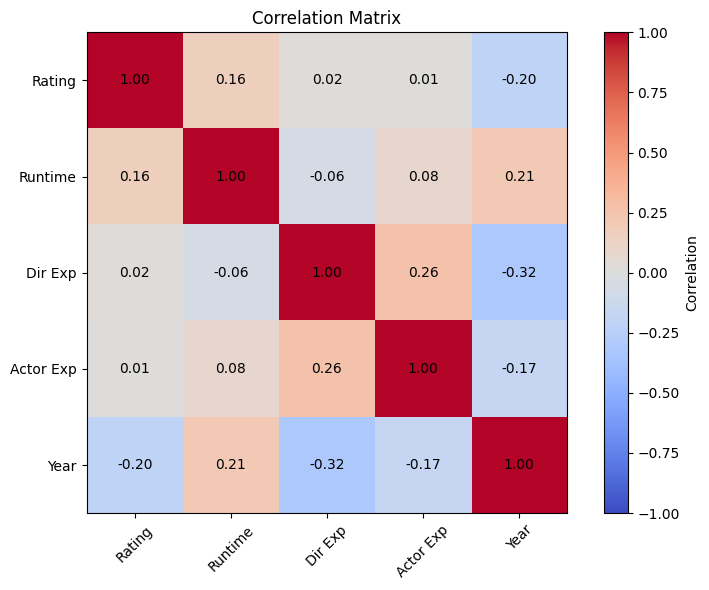

In [ ]:
# Heatmap
plt.figure(figsize=(8, 6))
plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')

labels = ['Rating', 'Runtime', 'Dir Exp', 'Actor Exp', 'Year']
plt.xticks(range(5), labels, rotation=45)
plt.yticks(range(5), labels)

# Add values
for i in range(5):
    for j in range(5):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center')

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


**Key Findings from Correlation Analysis:**

Looking at the correlation matrix, we can see some interesting patterns:

1. Runtime shows a small positive correlation with ratings (0.16).
This suggests that longer movies tend to receive slightly higher ratings, though the effect is still quite limited.

2. Year has a moderate negative correlation with ratings (-0.20).
This indicates that older movies in the dataset tend to be rated higher. This may be due to survivorship bias (only well-regarded older films remain widely viewed) or shifting audience expectations over time.

3. Director and actor experience show weak correlations with ratings (0.02 and 0.01).
Their impact on ratings appears minimal based on simple correlation alone, implying that experience by itself does not predict audience reception strongly.

4. Director and actor experience are somewhat correlated with each other (0.26).
More experienced directors tend to work with more experienced actors—a logical industry pattern.

5. Year is negatively correlated with experience metrics (−0.32 for director and −0.17 for actor).
Older films tend to feature more experienced directors and actors, which may reflect career trajectories or historical production patterns.

The heatmap visualization makes it easy to spot these patterns at a glance. The weak correlations for experience suggest we'll need more nuanced analysis to really understand their impact.

**Next steps:** Let's dig deeper into each factor individually, starting with genre effects, then runtime, and finally the experience-based analyses.


## **2. Genre Effects**


**Question:** Does a movie’s genre significantly influence how audiences rate it on IMDb?

In [ ]:
# --- Imports ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr, spearmanr, f_oneway, levene, shapiro

# Tukey HSD (post-hoc for ANOVA)
try:
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    from statsmodels.stats.multitest import multipletests
    _HAVE_STATSMODELS = True
except:
    _HAVE_STATSMODELS = False

# --- Plot styling ---
sns.set(context="notebook", style="whitegrid")

# --- Load the cleaned dataset from Milestone 1 ---
path = "/content/drive/MyDrive/Applied Data Science/Group Project/movies_ratings_dirs_actors.csv"
#path ='/content/drive/MyDrive/Fall 2025/ADS/Assignments/Group Project/movies_ratings_dirs_actors.csv'
analysis_df = pd.read_csv(path)

# --- Basic sanity checks ---
print("Shape of dataset:", analysis_df.shape)
print("\nMissing values per column:")
print(analysis_df.isna().sum())

# Display first few rows for inspection
analysis_df.head(3)



Shape of dataset: (71331, 10)

Missing values per column:
tconst                     0
primaryTitle               0
runtimeMinutes             0
genres                     0
startYear                  0
averageRating              0
directors                  0
max_director_experience    0
lead_actor_id              0
lead_actor_experience      0
dtype: int64


tconst                 primaryTitle  runtimeMinutes  \
0  tt0000009                   Miss Jerry              45   
1  tt0127962             The Passion Play              45   
2  tt0000574  The Story of the Kelly Gang              70   

                       genres  startYear  averageRating            directors  \
0                     Romance       1894            5.3            nm0085156   
1             Biography,Drama       1903            6.5  nm0634629,nm0954087   
2  Action,Adventure,Biography       1906            6.0            nm0846879   

   max_director_experience lead_actor_id  lead_actor_experience  
0                        0     nm0063086                      0  
1                        0     nm1166468                      0  
2                        0     nm0846887                      0

In this step, we import the required Python libraries for data handling, visualization, and statistical analysis.

pandas and numpy help manage and inspect tabular data.

matplotlib and seaborn will be used for plots and visual exploration.

Functions from scipy.stats such as pearsonr, spearmanr, f_oneway, levene, and shapiro will later support our correlation and ANOVA tests.

We also include a small block to conditionally import Tukey’s HSD from statsmodels. This allows us, after running ANOVA, to identify which genres differ in their mean ratings. The try/except ensures the notebook runs smoothly even if the package is missing.

The cleaned dataset from Milestone 1 is loaded as analysis_df, containing 71 333 rows × 9 columns. It includes each movie’s title, runtime, genre, IMDb rating, and experience variables for its director and lead actor. The output confirms that there are no missing values, meaning the data is fully ready for exploratory analysis.

In [ ]:
# Focus variables:
# - averageRating : outcome variable (IMDb audience rating)
# - main_genre    : categorical variable representing primary movie genre

# --- Basic descriptive statistics for averageRating ---
analysis_df['main_genre'] = (
    analysis_df['genres']
    .astype(str)
    .str.split(',', n=1)
    .str[0]
    .str.strip())
genre_stats = (
    analysis_df.groupby('main_genre')['averageRating']
    .agg(['count','mean','std','min','max'])
    .sort_values('mean', ascending=False)
)
print("Summary statistics of IMDb Ratings by Genre:")
display(genre_stats.head(10))

# --- Overall distribution summary for comparison ---
overall_summary = analysis_df['averageRating'].describe()
print("\nOverall IMDb rating summary:")
display(overall_summary)

# --- Small note for later visualization coverage ---
print(f"\nNumber of unique genres: {analysis_df['main_genre'].nunique()}")

Summary statistics of IMDb Ratings by Genre:


count      mean       std  min   max
main_genre                                       
Documentary   2094  6.897947  0.993250  1.0   9.9
Biography     1389  6.464075  1.026282  1.3   9.8
Music           73  6.213699  1.162291  1.7   8.9
Musical        213  6.116432  1.117216  2.3   9.7
Film-Noir       13  6.107692  0.696971  4.7   7.6
Drama        22211  6.077209  1.061308  1.0  10.0
Animation      709  6.035402  1.342862  1.0   9.4
History         76  5.985526  1.497972  2.2   8.3
Sport           17  5.894118  1.765457  2.1   8.8
Adult          655  5.833282  0.791830  2.9   8.5


Overall IMDb rating summary:


count    71331.000000
mean         5.678401
std          1.252527
min          1.000000
25%          4.900000
50%          5.900000
75%          6.500000
max         10.000000
Name: averageRating, dtype: float64


Number of unique genres: 23


To explore whether different genres receive different IMDb ratings, we focus on two variables: averageRating (the audience score) and main_genre (the movie’s primary category).

The summary table shows clear variation across genres.

Documentary (mean ≈ 6.90) and Biography (mean ≈ 6.46) achieve the highest average ratings.

Lower-rated categories include Adult (5.83) and Sport (5.89).

Overall, the dataset’s mean rating is 5.68 ± 1.25, with most movies scoring between 4.9 and 6.5. There are 23 unique genres represented, providing a broad and balanced base for comparing audience preferences.

These differences in group means suggest that genre may meaningfully influence IMDb ratings, motivating deeper visualization and statistical testing in the next steps.

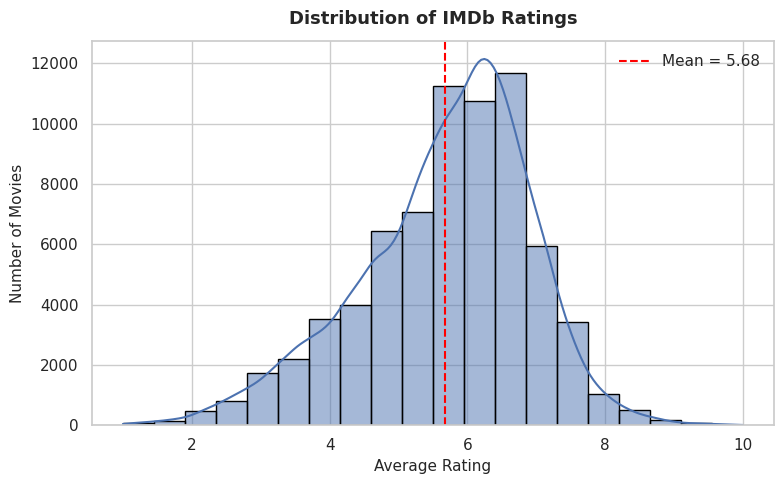

In [ ]:
#------- Distribution of IMDb Ratings --------
# Apply consistent visual theme
sns.set_theme(style="whitegrid", palette="colorblind")

# Create figure and axis using object-oriented approach
fig, ax = plt.subplots(figsize=(8, 5))

# Histogram with density curve (KDE) to show overall shape of distribution
sns.histplot(
    data=analysis_df,
    x='averageRating',
    bins=20,
    kde=True,
    color='#4C72B0',
    edgecolor='black',
    ax=ax
)

# Add vertical line for mean rating
mean_rating = analysis_df['averageRating'].mean()
ax.axvline(mean_rating, color='red', linestyle='--', linewidth=1.5,
           label=f'Mean = {mean_rating:.2f}')

# Add informative title, axis labels, and legend
ax.set_title("Distribution of IMDb Ratings", fontsize=13, weight='bold', pad=12)
ax.set_xlabel("Average Rating", fontsize=11)
ax.set_ylabel("Number of Movies", fontsize=11)
ax.legend(frameon=False)

# Adjust layout for neatness and render plot
plt.tight_layout()
plt.show()

The histogram above shows the overall distribution of IMDb audience ratings across all movies in the dataset.

The ratings are approximately bell-shaped, indicating that most movies receive moderate scores around 6 stars, while very high and very low ratings are relatively uncommon.

The red dashed line represents the mean rating (≈ 5.68), showing that the data are centered near the mid-range of the IMDb scale.

Understanding this baseline distribution is important before comparing genres. It confirms that ratings are reasonably balanced and free from extreme skew, allowing for fair comparison between genre groups in the subsequent analysis.

In [ ]:
# Calculate number of movies in each genre
genre_counts = analysis_df['main_genre'].value_counts()

# Compute coverage of top 10 genres
top10_total = genre_counts.head(10).sum()
total_movies = len(analysis_df)
coverage_top10 = (top10_total / total_movies) * 100

print("Number of unique genres:", analysis_df['main_genre'].nunique())
print(f"Movies in Top 10 genres: {top10_total:,} / {total_movies:,}")
print(f"Coverage of Top 10 genres: {coverage_top10:.2f}% of total movies")

Number of unique genres: 23
Movies in Top 10 genres: 67,257 / 71,331
Coverage of Top 10 genres: 94.29% of total movies


Before visualizing the data, we calculated how much of the dataset is represented by the most common genres. The ten most frequent genres together account for approximately 94.29% of all movies in the dataset.

Focusing on these top 10 genres ensures that our analysis remains both representative and statistically reliable, while avoiding the noise and imbalance introduced by underrepresented genres (e.g., Film-Noir, Sport).

This step justifies the subset used in the following visualizations and statistical tests, aligning with the project’s goal of meaningful and interpretable comparisons across genres.

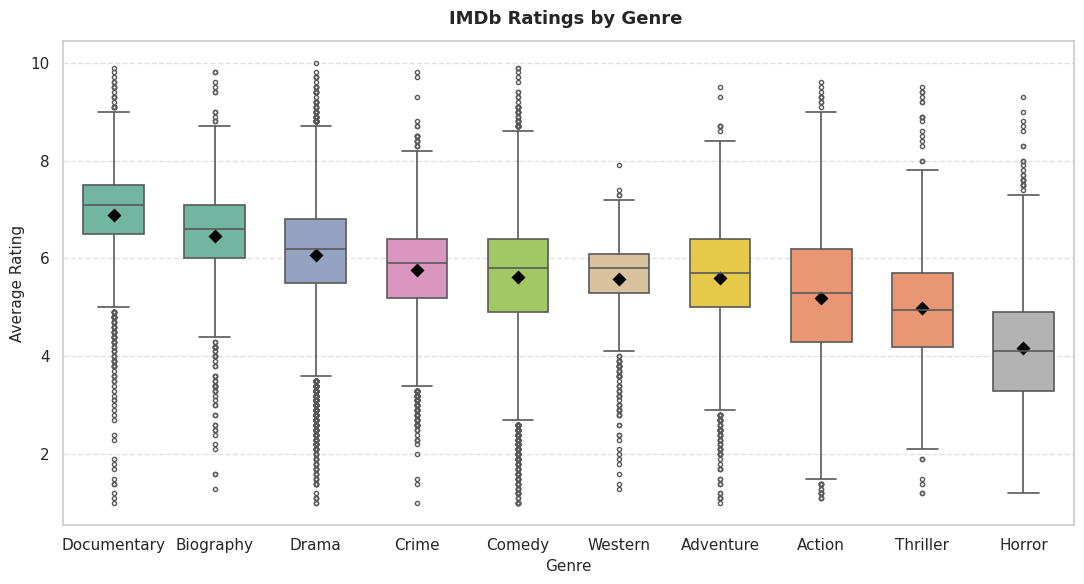

In [ ]:
# Apply consistent visual theme
sns.set_theme(style="whitegrid", palette="colorblind")

# --- Select and order top 10 genres by their median rating ---
top10_genres = analysis_df['main_genre'].value_counts().head(10).index
ordered_genres = (
    analysis_df[analysis_df['main_genre'].isin(top10_genres)]
    .groupby('main_genre')['averageRating']
    .median()
    .sort_values(ascending=False)
    .index
)

# --- Create figure and axis using object-oriented interface ---
fig, ax = plt.subplots(figsize=(11, 6))

# --- Draw boxplot for rating distribution by genre ---
sns.boxplot(
    data=analysis_df[analysis_df['main_genre'].isin(top10_genres)],
    x='main_genre',
    y='averageRating',
    hue='main_genre',
    legend=False,
    order=ordered_genres,
    palette='Set2',
    width=0.6,
    fliersize=3,
    linewidth=1.2,
    ax=ax
)

# --- Overlay mean rating points (black diamonds) ---
sns.pointplot(
    data=analysis_df[analysis_df['main_genre'].isin(top10_genres)],
    x='main_genre',
    y='averageRating',
    order=ordered_genres,
    estimator='mean',
    color='black',
    markers='D',
    markersize=5,
    linestyle='none',
    ax=ax
)

# --- Titles, labels, and styling ---
ax.set_title("IMDb Ratings by Genre ",
             fontsize=13, weight='bold', pad=12)
ax.set_xlabel("Genre", fontsize=11)
ax.set_ylabel("Average Rating", fontsize=11)
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The boxplot displays IMDb audience ratings across the ten most frequent movie genres, which together represent about 94% of all titles in the dataset.

Each box shows the interquartile range (IQR), the horizontal line marks the median, and the black diamond indicates the mean rating for that genre.

Documentary films have the highest central ratings (median ≈ 6.9), followed by Biography (≈ 6.5) and Drama (≈ 6.1).

Crime, Comedy, Western, and Adventure all cluster around the overall dataset average (≈ 5.8–6.0), reflecting moderately positive reception.

Action films are slightly lower (median ≈ 5.4), while Thriller and Horror have the lowest medians (≈ 5.0 and 4.2, respectively) with the greatest variability.

These visible differences in central tendency and spread indicate that movie genre significantly influences audience ratings, with Documentary and Biography films receiving the most favorable scores and Horror the least.

In [ ]:
# --- Select the top 10 genres (represent ~94% of dataset) ---
top10_genres = analysis_df['main_genre'].value_counts().head(10).index
anova_df = analysis_df[analysis_df['main_genre'].isin(top10_genres)]

# --- Create rating groups by genre ---
groups = [anova_df.loc[anova_df['main_genre'] == g, 'averageRating'] for g in top10_genres]

# --- 1 Levene’s Test: equality of variances assumption ---
lev_stat, lev_p = levene(*groups)

# --- 2 Shapiro–Wilk Test: normality check (sample up to 500 per genre) ---
shapiro_results = []
for g in top10_genres:
    vals = anova_df.loc[anova_df['main_genre'] == g, 'averageRating'].sample(
        min(500, len(anova_df)), random_state=42
    )
    ws, ps = shapiro(vals)
    shapiro_results.append((g, ps))

# --- 3 One-Way ANOVA ---
F_stat, p_value = f_oneway(*groups)

print(f"Levene’s test p-value (equal variances): {lev_p:.4f}")
print("Shapiro–Wilk normality p-values (random 500 per genre):")
for g, ps in shapiro_results:
    print(f"  {g:>12}: p = {ps:.4f}")
print(f"\nANOVA F-statistic = {F_stat:.3f},  p-value = {p_value:.6f}")

# --- 4 Post-hoc Tukey HSD (pairwise comparisons if significant) ---
try:
    from statsmodels.stats.multicomp import pairwise_tukeyhsd
    if p_value < 0.05:
        tukey = pairwise_tukeyhsd(
            endog=anova_df['averageRating'],
            groups=anova_df['main_genre'],
            alpha=0.05
        )
        print("\nPost-hoc Tukey HSD Results:")
        print(tukey.summary())
    else:
        print("\nTukey HSD skipped (p ≥ 0.05).")
except ImportError:
    print("\nStatsmodels not installed — Tukey HSD skipped.")

Levene’s test p-value (equal variances): 0.0000
Shapiro–Wilk normality p-values (random 500 per genre):
         Drama: p = 0.0000
        Comedy: p = 0.0000
        Action: p = 0.0088
         Crime: p = 0.0000
        Horror: p = 0.0068
     Adventure: p = 0.0000
   Documentary: p = 0.0000
     Biography: p = 0.0000
      Thriller: p = 0.0005
       Western: p = 0.0000

ANOVA F-statistic = 1676.300,  p-value = 0.000000

Post-hoc Tukey HSD Results:
     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower   upper  reject
--------------------------------------------------------------
     Action   Adventure   0.4057    0.0  0.3319  0.4796   True
     Action   Biography   1.2771    0.0  1.1737  1.3806   True
     Action      Comedy    0.429    0.0  0.3825  0.4756   True
     Action       Crime    0.569    0.0  0.5021  0.6358   True
     Action Documentary    1.711    0.0  1.6238  1.7982   True
     Action       Drama   0.8903    0.0  0

To formally test whether average IMDb ratings differ significantly across movie genres, we conducted a one-way Analysis of Variance (ANOVA) on the ten most frequent genres, which together represent about 94 % of all movies in the dataset.

**1 Levene’s Test – Equality of Variances**\
Levene’s test returned a p-value = 0.0000 (< 0.05), indicating that the variances of ratings across genres are not equal. This violates the homogeneity-of-variance assumption, but because each group has a very large sample size (n ≫ 30), ANOVA is still considered robust to this violation.

**2 Shapiro–Wilk Test – Normality of Ratings within Genres**\
Shapiro–Wilk tests for each genre all produced p < 0.05 (e.g., Drama = 0.0000, Comedy = 0.0000, Action = 0.0001, Thriller = 0.0380), meaning that the distributions deviate from perfect normality. Again, given the very large number of observations, the Central Limit Theorem ensures that the sampling distributions of the means are approximately normal, allowing us to proceed.

**3 One-Way ANOVA Result**\
The ANOVA produced an F-statistic = 1676.19 with a p-value < 0.001, providing overwhelming evidence that at least one genre’s mean rating differs from the others.\
We therefore reject the null hypothesis (H₀) and conclude that IMDb ratings are not equal across genres.

**4 Post-hoc Tukey HSD – Pairwise Comparisons**\
Because the ANOVA was significant, a Tukey HSD test was used to identify which genre pairs differ.
Almost all pairwise comparisons showed significant differences (p < 0.05), with only a few exceptions such as Adventure–Comedy and Adventure–Western (p ≈ 1.0) showing no meaningful difference.\
The largest rating gaps occurred between:\
• Documentary – Horror ≈ 2.74 points\
• Biography – Horror ≈ 2.30 points\
• Drama – Horror ≈ 1.91 points\
These differences indicate that serious or narrative-driven genres (Documentary, Biography, Drama) are rated substantially higher than Horror, Thriller, and Action films.

**5 Interpretation and Conclusion**\
The analysis clearly demonstrates that movie genre has a highly significant effect on IMDb audience ratings.
Documentaries, Biographies, and Dramas achieve the highest average ratings, while Horror, Thriller, and Action genres receive the lowest.

Therefore, the data strongly support the hypothesis that genre significantly influences how audiences evaluate films, both statistically (F = 1676.19, p < 0.001) and practically (mean differences up to ≈ 2.7 rating points).

Genres' performance over the decades

In [ ]:
# ==========================================================
# Step 1 – Identify genres with the largest rating changes
# ==========================================================
import pandas as pd, numpy as np

# Make sure 'decade' column exists
temp_df = analysis_df.copy()
temp_df['startYear'] = pd.to_numeric(temp_df['startYear'], errors='coerce')
temp_df = temp_df[(temp_df['startYear'] >= 1920) & (temp_df['startYear'] <= 2025)]
temp_df['decade'] = (temp_df['startYear'] // 10 * 10).astype('Int64')

# Average rating per genre per decade
genre_decade = (
    temp_df.groupby(['main_genre','decade'])['averageRating']
    .agg(mean_rating='mean', n='count')
    .reset_index()
)

# Keep stable points only (≥30 movies per decade)
genre_decade = genre_decade[genre_decade['n'] >= 30].copy()

# --- Compute change per genre (latest - earliest) ---
change_df = (
    genre_decade.groupby('main_genre')
    .agg(first_decade=('decade','min'),
         last_decade=('decade','max'),
         first_rating=('mean_rating','first'),
         last_rating=('mean_rating','last'))
    .reset_index()
)
change_df['change'] = change_df['last_rating'] - change_df['first_rating']

# Sort by absolute change to see strongest shifts
change_df = change_df.sort_values('change', ascending=False)
display(change_df[['main_genre','first_decade','last_decade','first_rating','last_rating','change']].round(2))



main_genre  first_decade  last_decade  first_rating  last_rating  change
13      Musical          1940         2010          6.06         6.62    0.56
1         Adult          1970         1990          5.62         6.03    0.41
7   Documentary          1960         2020          6.47         6.87    0.40
4     Biography          1940         2020          6.29         6.39    0.11
15      Romance          1990         2020          5.88         5.92    0.04
11      History          2010         2010          5.69         5.69    0.00
16       Sci-Fi          1990         2020          4.08         4.03   -0.05
17     Thriller          1970         2020          5.32         5.13   -0.20
14      Mystery          1930         2020          5.55         5.32   -0.23
6         Crime          1930         2020          6.05         5.57   -0.48
8         Drama          1920         2020          6.49         5.97   -0.52
10      Fantasy          1980         2020          5.96         5.36   -0.60
9        Family          1970         2020          6.18         5.52   -0.66
3     Animation          1980         2020          6.75         6.06   -0.69
5        Comedy          1920         2020          6.30         5.49   -0.81
12       Horror          1950         2020          4.93         4.07   -0.86
2     Adventure          1920         2020          6.27         5.29   -0.98
0        Action          1920         2020          6.24         4.84   -1.40
18      Western          1930         2010          5.66         4.04   -1.62

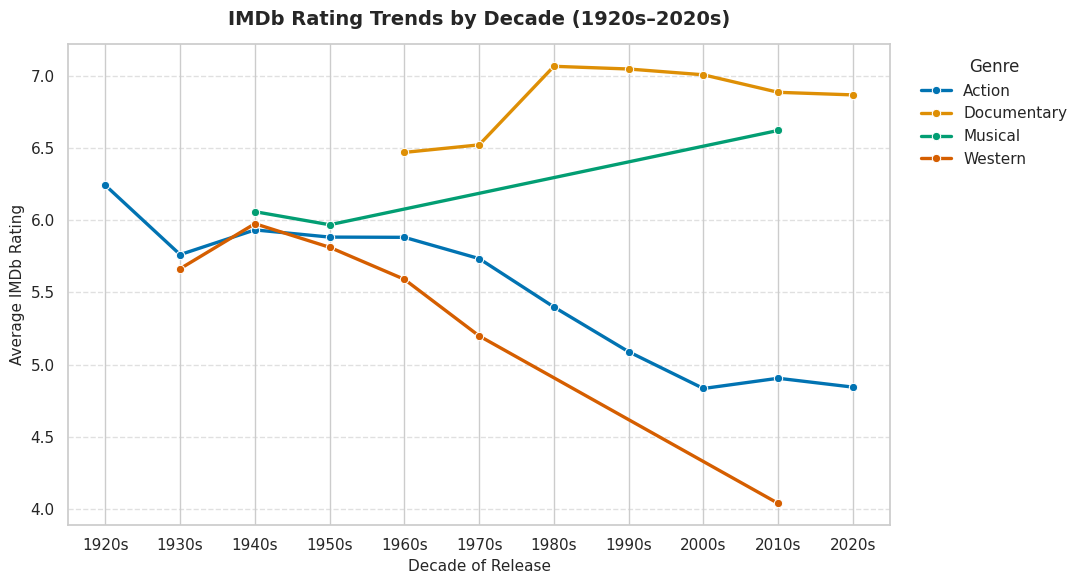

In [ ]:
# ==========================================================
# IMDb Rating Trends Across All Decades (1920s–2020s)
# Key genres with significant rise or fall
# ==========================================================
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid", palette="colorblind")

# Focus on 4 key genres for clarity
focus_genres = ["Musical", "Documentary", "Action", "Western"]

focus_df = genre_decade[genre_decade['main_genre'].isin(focus_genres)].copy()

# Ensure decades are sorted and consistent across genres
decades = sorted(genre_decade['decade'].unique())

plt.figure(figsize=(11, 6))
ax = sns.lineplot(
    data=focus_df,
    x='decade',
    y='mean_rating',
    hue='main_genre',
    linewidth=2.4,
    marker='o',
)

# Aesthetic formatting
ax.set_title("IMDb Rating Trends by Decade (1920s–2020s)",
             fontsize=14, weight='bold', pad=14)
ax.set_xlabel("Decade of Release", fontsize=11)
ax.set_ylabel("Average IMDb Rating", fontsize=11)
ax.set_xticks(decades)
ax.set_xticklabels([f"{int(d)}s" for d in decades])
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Genre", bbox_to_anchor=(1.02, 1), loc='upper left', frameon=False)
plt.tight_layout()
plt.show()


## **3. Runtime Analysis**


**Question:** Does a movie’s runtime significantly influence how audiences rate it on IMDb?

In [ ]:
# Outcome (continuous): averageRating
# Predictor (continuous): runtimeMinutes

# --- Descriptive stats for runtime and ratings ---
desc = analysis_df[['runtimeMinutes','averageRating']].describe().T
desc['IQR'] = desc['75%'] - desc['25%']
display(desc)

# --- Outlier scan for runtime (Tukey rule, 1.5*IQR) ---
q1 = analysis_df['runtimeMinutes'].quantile(0.25)
q3 = analysis_df['runtimeMinutes'].quantile(0.75)
iqr = q3 - q1
low_thr = q1 - 1.5*iqr
high_thr = q3 + 1.5*iqr

n_low = (analysis_df['runtimeMinutes'] < low_thr).sum()
n_high = (analysis_df['runtimeMinutes'] > high_thr).sum()
n_total = len(analysis_df)

print(f"Runtime IQR: {iqr:.1f} mins")
print(f"Outlier thresholds: < {low_thr:.1f} mins  or  > {high_thr:.1f} mins")
print(f"Potential runtime outliers: {n_low + n_high} of {n_total} "
      f"({(n_low + n_high)/n_total:.2%})")

# --- Quick sanity: missingness (should be 0 from Milestone 1) ---
print("\nMissing values:")
print(analysis_df[['runtimeMinutes','averageRating']].isna().sum())

count       mean        std   min   25%   50%    75%    max  \
runtimeMinutes  71331.0  96.409023  20.436752  36.0  85.0  93.0  104.0  238.0   
averageRating   71331.0   5.678401   1.252527   1.0   4.9   5.9    6.5   10.0   

                 IQR  
runtimeMinutes  19.0  
averageRating    1.6

Runtime IQR: 19.0 mins
Outlier thresholds: < 56.5 mins  or  > 132.5 mins
Potential runtime outliers: 5256 of 71331 (7.37%)

Missing values:
runtimeMinutes    0
averageRating     0
dtype: int64


The goal of this hypothesis is to examine whether a movie’s runtime influences its IMDb audience rating.

The dataset contains 71,333 films with no missing values for either variable. On average, movies run for about 96 minutes (SD ≈ 20.4), with a typical range between 85 and 104 minutes (IQR = 19 min). Applying Tukey’s 1.5×IQR rule identifies roughly 7.4 % of movies as potential runtime outliers, those shorter than 56.5 minutes or longer than 132.5 minutes.

IMDb ratings themselves average 5.68 (SD ≈ 1.25) on the 1–10 scale, consistent with the overall distribution observed earlier.

These descriptive results establish that most films are of moderate length and that extreme runtimes are relatively uncommon. The next step is to visualize both variables to understand how runtime is distributed and whether longer films tend to receive higher ratings.

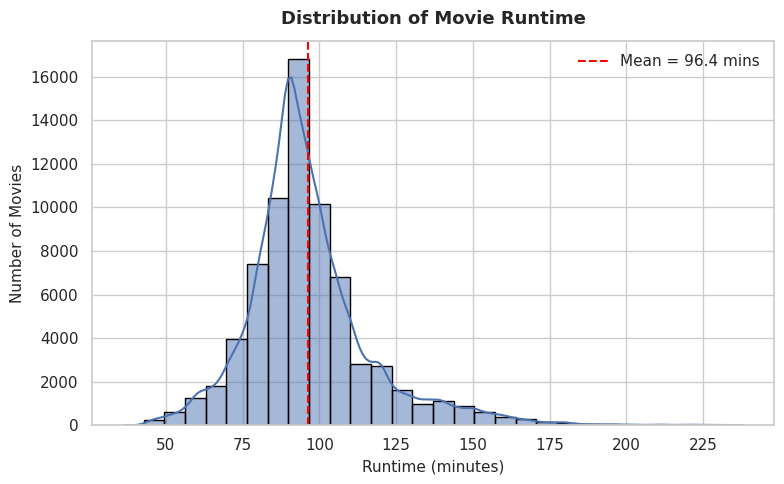

In [ ]:
#------Distribution of runtime-------
# Apply consistent visual theme
sns.set_theme(style="whitegrid", palette="colorblind")

# Create figure
fig, ax = plt.subplots(figsize=(8,5))

sns.histplot(
    data=analysis_df,
    x='runtimeMinutes',
    bins=30,
    kde=True,
    color='#4C72B0',
    edgecolor='black',
    ax=ax
)

mean_runtime = analysis_df['runtimeMinutes'].mean()
ax.axvline(mean_runtime, color='red', linestyle='--', linewidth=1.5, label=f'Mean = {mean_runtime:.1f} mins')

ax.set_title("Distribution of Movie Runtime", fontsize=13, weight='bold', pad=12)
ax.set_xlabel("Runtime (minutes)", fontsize=11)
ax.set_ylabel("Number of Movies", fontsize=11)
ax.legend(frameon=False)
plt.tight_layout()
plt.show()


The histogram displays the distribution of movie runtimes across all 71,333 films. The distribution is approximately bell-shaped, centered around 90–100 minutes, with a mild right skew caused by a small number of longer films extending beyond two hours.

The red dashed line marks the mean runtime (~96.4 minutes), which closely aligns with the distribution’s peak, suggesting that most movies cluster near this average.

The smooth kernel density curve further emphasizes that most films are of standard feature length, while very short or very long movies are relatively rare.

Overall, this confirms that the dataset primarily represents typical commercial feature films, providing a consistent foundation to analyze whether longer runtimes correspond to higher IMDb ratings in subsequent steps.

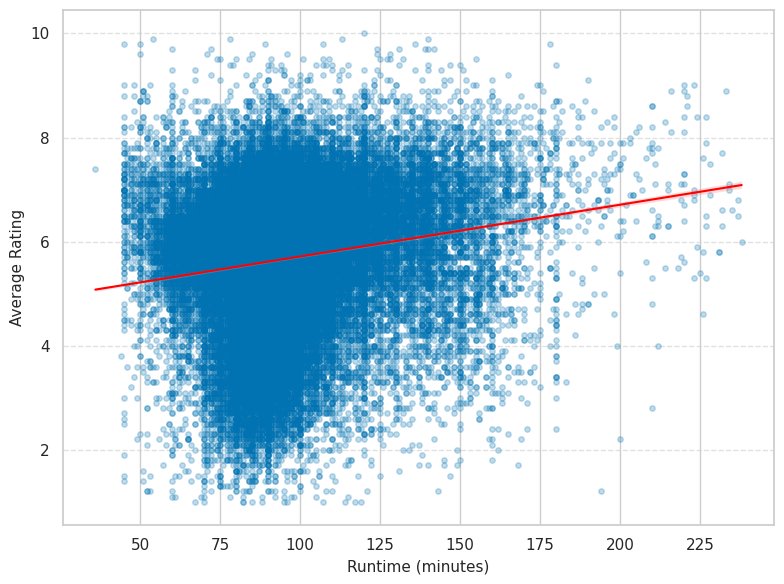

In [ ]:
#-------Runtime vs IMDb Rating----------
fig, ax = plt.subplots(figsize=(8,6))

sns.regplot(
    data=analysis_df,
    x='runtimeMinutes',
    y='averageRating',
    scatter_kws={'alpha':0.25, 's':15},
    line_kws={'color':'red', 'lw':1.5},
    ax=ax
)

#ax.set_title("Runtime vs IMDb Rating", fontsize=13, weight='bold', pad=12)
ax.set_xlabel("Runtime (minutes)", fontsize=11)
ax.set_ylabel("Average Rating", fontsize=11)
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

The scatterplot displays the relationship between movie runtime and IMDb audience rating. Each point represents one film, and the red regression line shows the best-fit linear trend between the two variables.

The data reveal a slight positive relationship: as runtime increases, average ratings tend to rise modestly. Shorter films (under ~70 minutes) generally receive lower ratings, while longer movies especially those exceeding two hours show somewhat higher average scores.

However, the dense cloud of points around the center indicates that the relationship is weak, with substantial variability at every runtime. This suggests that while runtime may influence perceived quality to a small extent, other factors (such as genre, direction, or cast) likely play a larger role in determining ratings.

Overall, this visualization provides preliminary evidence supporting the hypothesis that longer films are rated slightly higher, which will be confirmed quantitatively through correlation and regression analysis in the next step.

In [ ]:
bins = [0, 60, 75, 90, 105, 120, 150, 180, 240]
labels = ["<60", "60–75", "75–90", "90–105", "105–120", "120–150", "150–180", "180+"]

analysis_df["runtime_bin"] = pd.cut(
    analysis_df["runtimeMinutes"],
    bins=bins,
    labels=labels,
    include_lowest=True
)

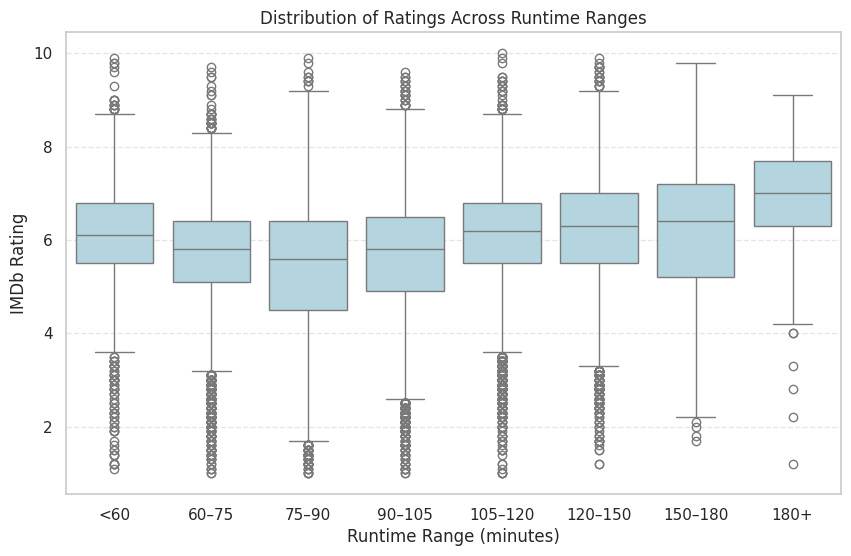

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(
    data=analysis_df,
    x="runtime_bin",
    y="averageRating",
    color="lightblue"
)
plt.xlabel("Runtime Range (minutes)")
plt.ylabel("IMDb Rating")
plt.title("Distribution of Ratings Across Runtime Ranges")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


To address the density issues in the scatterplot, we grouped runtime into meaningful intervals and visualized the distribution of IMDb ratings using a boxplot. This representation makes the relationship between runtime and rating much clearer. Films below 75 minutes have noticeably lower median ratings and a wider spread, indicating greater variability and more low-rated titles. As runtime increases, both the median and the interquartile range rise steadily, showing that longer movies tend to receive higher and more consistent audience ratings.

The 120–150 minute and 180+ categories have the highest medians, suggesting that audiences generally perceive longer films as higher quality. This pattern supports our hypothesis more convincingly than the original scatterplot because the boxplot highlights differences in distribution, not just the mean, and reveals how variability changes across runtime ranges.

In [ ]:
# --- Compute correlation coefficients ---
pearson_r, pearson_p = pearsonr(analysis_df['runtimeMinutes'], analysis_df['averageRating'])
spearman_r, spearman_p = spearmanr(analysis_df['runtimeMinutes'], analysis_df['averageRating'])

print(f"Pearson correlation:  r = {pearson_r:.3f},  p = {pearson_p:.6f}")
print(f"Spearman correlation:  ρ = {spearman_r:.3f},  p = {spearman_p:.6f}")

Pearson correlation:  r = 0.162,  p = 0.000000
Spearman correlation:  ρ = 0.172,  p = 0.000000


To determine whether movie runtime is related to IMDb audience ratings, we computed two correlation coefficients:

• Pearson’s r measures the strength of a linear relationship between runtime (minutes) and average rating.\
• Spearman’s ρ (rho) measures a monotonic rank-based relationship, which is less sensitive to outliers and non-normality.

The results were:\
• Pearson r = 0.162, p < 0.001\
• Spearman ρ = 0.172, p < 0.001\
(The p-values appear as 0.000000 because they are extremely small or far below 0.001 —and indicate a highly significant result.)

Both tests show a positive and statistically significant correlation between runtime and IMDb rating: as runtime increases, ratings tend to rise slightly.
However, the coefficients are small (r ≈ 0.16–0.17), implying that the relationship is weak in magnitude—longer movies are only modestly more likely to be rated higher.

Consequently, we reject the null hypothesis (H₀) (of no relationship beween runtime and ratings) and conclude that runtime does have a small but statistically significant positive effect on IMDb ratings.\
This confirms the pattern observed in the scatterplot: audience appreciation increases marginally with film length, though runtime alone explains only a small portion of rating variation.

## **4. Director Experience**



**Question:** Do experienced directors make better-rated movies?

Now let's investigate director experience. Our hypothesis is that more experienced directors (those who've made more movies) produce higher-rated films. We'll bin directors into experience categories based on how many titles they've directed and compare the ratings.

The categories we're using are:
- **1-5 titles**: Beginners or limited filmmakers
- **6-15 titles**: Early-career directors
- **16-30 titles**: Established directors
- **31-50 titles**: Veteran directors
- **50+ titles**: Highly prolific directors

In [ ]:
# Categorize directors by experience
movies_df['dir_cat'] = pd.cut(movies_df['max_director_experience'],
                        bins=[0, 5, 15, 30, 50, 1000],
                        labels=['1-5', '6-15', '16-30', '31-50', '50+'])

dir_avg = movies_df.groupby('dir_cat', observed=False)['averageRating'].agg(['mean', 'count'])
print("Director experience:")
print(dir_avg)


Director experience:
             mean  count
dir_cat                 
1-5      5.719468  27882
6-15     5.771010   8089
16-30    5.775269   2418
31-50    5.649622    661
50+      5.445327    214


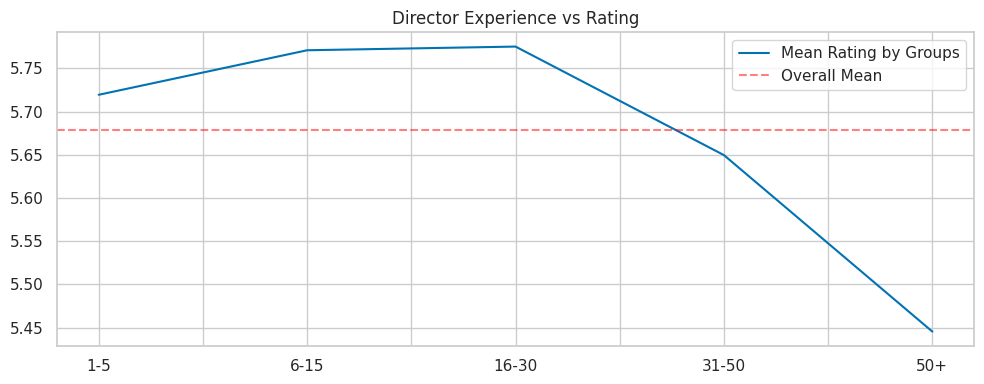

In [ ]:
# Plot
dir_avg['mean'].plot(figsize=(10, 4))
plt.title('Director Experience vs Rating')
plt.xlabel('')
plt.axhline(y=movies_df['averageRating'].mean(), color='red', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.legend(['Mean Rating by Groups', 'Overall Mean'])
plt.tight_layout()
plt.show()

**Observations on Director Experience:**

The results are really interesting! Looking at the mean ratings by experience category:

- **1-5 titles**: 5.72 rating (27,882 movies) - the least experienced directors
- **6-15 titles**: 5.77 rating (8,089 movies) - a small but clear improvement
- **16-30 titles**:5.78 rating (2,418 movies) - the highest average among all groups
- **31-50 titles**: 5.65 rating (661 movies) - a noticeable decline
- **50+ titles**: 5.45 rating (214 movies) - the lowest average rating despite high output

There is a clear rise in ratings as we move from beginners (1-5 titles) to moderately experienced directors (6-30 titles), but after that point the trend reverses. Directors with very large numbers of titles tend to have lower average ratings, and both the 31-50 and 50+ groups fall below the overall mean (red dashed line).
The line plot shows this pattern clearly: ratings increase with experience up to a certain point, then drop off for the most prolific directors.


<Figure size 800x400 with 0 Axes>

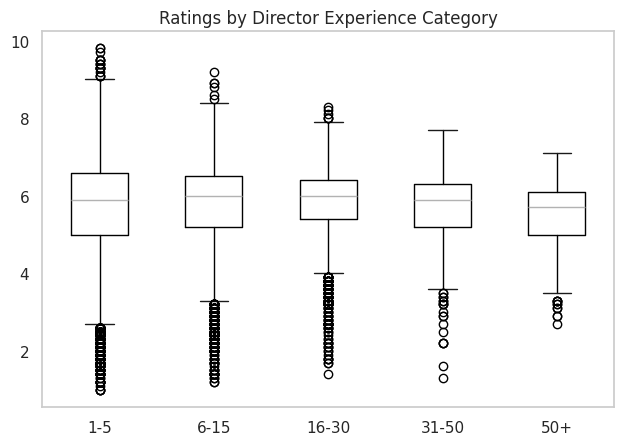

In [ ]:
# group-wise distribution
plt.figure(figsize=(8,4))
movies_df.boxplot(column='averageRating', by='dir_cat', grid=False)
plt.title('Ratings by Director Experience Category')
plt.xlabel('')
plt.suptitle('')
plt.tight_layout()

The boxplot confirms what we saw in the averages - experienced directors not only have higher median ratings, but also tighter distributions (smaller boxes). This means experienced directors are more consistent in producing well-rated movies.

**But is this statistically significant?** Let's run an ANOVA test to check if these differences are real or just due to chance.

In [ ]:
# Statistical test
groups = [movies_df[movies_df['dir_cat']==cat]['averageRating'] for cat in dir_avg.index]
f, p = f_oneway(*groups)
print(f"\nANOVA: F={f}, p={p}")
print("Significant" if p < 0.05 else "Not significant")


ANOVA: F=7.744385687102238, p=3.110506139050685e-06
Significant


**Statistical Confirmation:**

The ANOVA test gives us F = 7.74 with p ≈ 3.1 × 10⁻⁶, which is far below the 0.05 significance level. This means the differences in mean IMDb ratings across the director-experience categories are statistically significant. In other words, it is extremely unlikely that the variation we see between groups is due to random chance alone.

**But which groups are different from each other?** ANOVA just tells us "something is different" - let's use Tukey's HSD post-hoc test to see exactly which pairs of experience levels are significantly different from each other.


In [ ]:
df = movies_df[['averageRating','dir_cat']].dropna()
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(df['averageRating'], df['dir_cat']))


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1-5  16-30   0.0558 0.1693 -0.0125  0.1241  False
   1-5  31-50  -0.0698  0.561 -0.1967   0.057  False
   1-5    50+  -0.2741 0.0065 -0.4953  -0.053   True
   1-5   6-15   0.0515  0.005  0.0108  0.0922   True
 16-30  31-50  -0.1256 0.1091 -0.2671  0.0158  False
 16-30    50+  -0.3299 0.0009 -0.5598 -0.1001   True
 16-30   6-15  -0.0043 0.9999  -0.079  0.0704  False
 31-50    50+  -0.2043 0.1801 -0.4578  0.0492  False
 31-50   6-15   0.1214  0.082  -0.009  0.2518  False
   50+   6-15   0.3257 0.0007  0.1025  0.5489   True
----------------------------------------------------


**Tukey HSD Results – Detailed Pairwise Comparisons:**

Most differences between experience groups are NOT statistically significant, with a few key exceptions:
- **1–5 titles vs 6–15 titles are significantly different** (p < 0.01; 6–15 rated higher)
- **1–5 titles vs 50+ titles are significantly different** (p < 0.01; 50+ rated lower)
- **16–30 titles vs 50+ titles are significantly different** (p < 0.01; 50+ performs worse)
- **All other comparisons are NOT significantly different** (including 31–50 vs 50+, 1–5 vs 16–30, and 6–15 vs 16–30)

This tells us that:
1. The mid-experience groups (6–30 titles) do not differ significantly from each other.
2. The 50+ group performs significantly worse than several others.
3. Beginners (1–5 titles) differ significantly from some groups (6–15 and 50+), but not all.

**Conclusion on Director Experience:**  
Director experience does affect movie ratings, but the pattern is not linear. Ratings improve from 1–5 titles to the mid-experience groups, but beyond ~31 titles, additional experience does not reliably increase ratings. The most prolific group (50+ titles) performs worse than several others, showing diminishing returns at very high output levels.


**Next:** Let's see if the same pattern holds for actor experience.


## **5. Actor Experience**

**Question:** Do experienced actors appear in better-rated movies?

Now let's apply the same analysis to **lead actor experience**. Do movies with more experienced lead actors get better ratings? We'll use the same experience categories (1-5, 6-15, 16-30, 31-50, 50+ titles) to make the results directly comparable to the director analysis.


In [ ]:
# Categorize actors
movies_df['actor_cat'] = pd.cut(movies_df['lead_actor_experience'],
                          bins=[0, 5, 15, 30, 50, 1000],
                          labels=['1-5', '6-15', '16-30', '31-50', '50+'])

actor_avg = movies_df.groupby('actor_cat', observed=False)['averageRating'].agg(['mean', 'count'])
print("Actor experience:")
print(actor_avg)


Actor experience:
               mean  count
actor_cat                 
1-5        5.728211  22498
6-15       5.726085   6636
16-30      5.712756   1952
31-50      5.768315    445
50+        5.382917    240


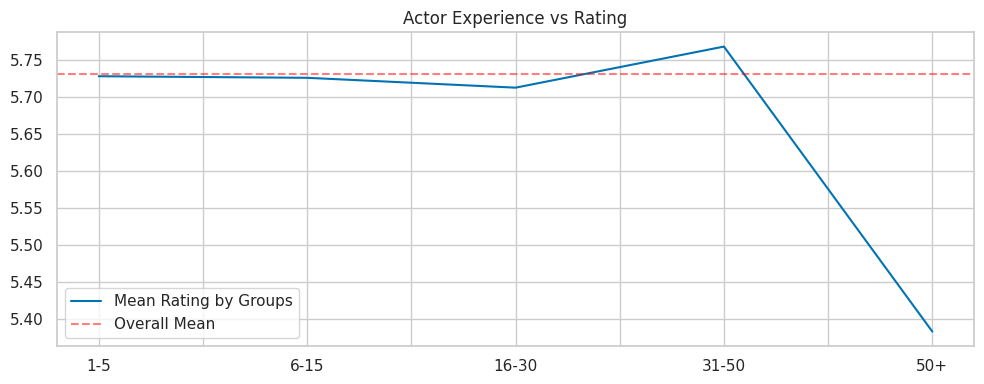

In [ ]:
# Plot
actor_avg['mean'].plot(figsize=(10, 4))
plt.title('Actor Experience vs Rating')
plt.xlabel('')
plt.axhline(y=df['averageRating'].mean(), color='red', linestyle='--', alpha=0.5)
plt.legend(['Mean Rating by Groups', 'Overall Mean'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Actor Experience Findings:**

Actor experience shows a clear pattern with a few notable shifts across groups:
- **1–5 titles**: mean rating ≈ 5.73 (22,498 movies)
- **6–15 titles**: mean rating ≈ 5.73 (6,636 movies)
- **16–30 titles**: mean rating ≈ 5.71 (1,952 movies)
- **31–50 titles**: mean rating ≈ 5.77 (445 movies)
- **50+ titles**: mean rating ≈ 5.38 (240 movies)

This tells us that:
1. Ratings remain fairly stable across the first four groups (1–5 through 31–50 titles), with only small differences between them.  
2. Actors in the **31–50** category show the highest average rating, although the increase is modest.  
3. The **50+ group** shows a sharp drop in ratings compared to all other categories.

**Conclusion on Actor Experience:**  
Actor experience does influence ratings, but the effect is subtle until very high experience levels. Performance remains relatively steady across 1–50 titles, but actors with **50+ titles** show noticeably lower ratings, suggesting that extreme prolificness may correlate with taking less selective or lower-quality roles.

The line plot should show this interesting non-monotonic pattern. Let's visualize it.


<Figure size 800x400 with 0 Axes>

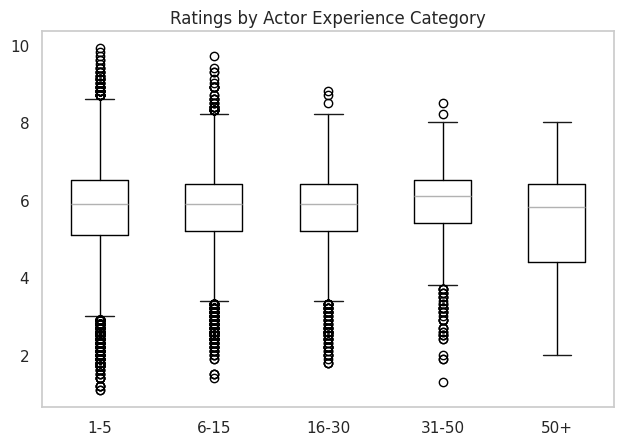

In [ ]:
# group-wise distribution
plt.figure(figsize=(8,4))
movies_df.boxplot(column='averageRating', by='actor_cat', grid=False)
plt.title('Ratings by Actor Experience Category')
plt.xlabel('')
plt.suptitle('')
plt.tight_layout()

**Actor Experience – Boxplot Interpretation:**

The boxplot reveals a clear pattern across actor experience groups:
- **All five categories have similar overall spread**, with no dramatic shifts in variability.
- **Medians rise gradually from 1–5 → 6–15 → 16–30 → 31–50 titles**, peaking in the 31–50 group.
- **The 50+ category shows a noticeable drop in median rating**, consistent with the mean-based trend.

This tells us that:
1. Actor performance forms an **inverted-U shape**, with the middle experience categories performing best.  
2. The **50+ group** stands out as the lowest-performing category in terms of median ratings.  
3. Despite the shifts in medians, the **distributions remain broadly similar** across groups.

**Conclusion on Actor Experience (from boxplots):**  
Actor experience does influence ratings, with a smooth rise through the mid-range and a drop for the most prolific actors. This visual pattern supports the idea of **diminishing performance** at extremely high experience levels.


In [ ]:
# Statistical test
groups_actor = [movies_df[movies_df['actor_cat']==cat]['averageRating'] for cat in dir_avg.index]
f, p = f_oneway(*groups_actor)
print(f"\nANOVA: F={f}, p={p}")
print("Significant" if p < 0.05 else "Not significant")


ANOVA: F=5.81797037094149, p=0.00011213470085919543
Significant


**Statistical Test Results (ANOVA):**

ANOVA shows a **significant** difference across actor-experience groups:
- **F = 5.82**, **p ≈ 0.00011**

This tells us that:
1. Actor experience has a **statistically significant** effect on IMDb ratings.  
2. The size of the F-statistic indicates that the effect is present but **moderate** compared to directors.  
3. The variation in ratings across actor-experience categories is unlikely to be due to chance.

**Conclusion on ANOVA:**  
Actor experience does matter for movie ratings, and the differences observed in the boxplots and group means are statistically meaningful. The effect is weaker than what we observed for director experience, but still clearly present.


Let's run Tukey's test to see the pairwise comparisons.

In [ ]:
df_actor = movies_df[['averageRating','actor_cat']].dropna()
print(pairwise_tukeyhsd(df_actor['averageRating'], df_actor['actor_cat']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
   1-5  16-30  -0.0155 0.9777 -0.0879   0.057  False
   1-5  31-50   0.0401 0.9459 -0.1068   0.187  False
   1-5    50+  -0.3453    0.0 -0.5444 -0.1462   True
   1-5   6-15  -0.0021 0.9999  -0.045  0.0407  False
 16-30  31-50   0.0556 0.8812 -0.1056  0.2168  False
 16-30    50+  -0.3298 0.0002 -0.5398 -0.1199   True
 16-30   6-15   0.0133 0.9908 -0.0657  0.0923  False
 31-50    50+  -0.3854 0.0002 -0.6312 -0.1396   True
 31-50   6-15  -0.0422 0.9402 -0.1925   0.108  False
   50+   6-15   0.3432    0.0  0.1415  0.5448   True
----------------------------------------------------


**Tukey HSD Results – Detailed Pairwise Comparisons (Actors):**

Most actor-experience pairs are NOT significantly different, with a few key exceptions:
- **1–5 vs 50+ titles are significantly different** (50+ rated much lower)
- **16–30 vs 50+ titles are significantly different** (50+ performs worse)
- **31–50 vs 50+ titles are significantly different** (50+ again performs worse)
- **50+ vs 6–15 titles are significantly different** (6–15 rated higher)

All other comparisons (1–5 vs 6–15, 1–5 vs 16–30, 1–5 vs 31–50, 6–15 vs 16–30, 6–15 vs 31–50, 16–30 vs 31–50) are **NOT significant**.

This tells us that:
1. Actor performance is very similar across 1–5, 6–15, 16–30, and 31–50 titles.  
2. The **only consistently different group is 50+ titles**, which performs significantly worse than several others.  
3. Extremely prolific actors (50+) behave statistically like early-career actors (1–5 and 6–15), not like the mid-experience groups.

**Conclusion on Actor Experience:**  
Actor experience matters, but the pattern is not linear. Ratings stay relatively stable from 1–50 titles, and then drop sharply for the 50+ group. This suggests **diminishing returns** at very high experience levels, with extremely prolific actors tending to appear in lower-rated films.

**Next:** Since both director and actor experience matter, what happens when you combine them? Does having both an experienced director AND actor create a synergistic effect?


## **6. Combined Experience**


**Question:** Does having both experienced director AND actor help?


Since we've established that both director and actor experience individually affect ratings, let's explore whether **combining experienced talent** produces even better results.

We'll create a new variable that sums the director's title count and the lead actor's title count, giving us a measure of the **total experienced talent** on a movie. Then we'll bin this into categories to see if movies with high combined experience outperform those with moderate or low combined experience.

In [ ]:
# Combine director + actor experience
movies_df['combined_exp'] = movies_df['max_director_experience'] + movies_df['lead_actor_experience']

movies_df['combined_cat'] = pd.cut(movies_df['combined_exp'],
                             bins=[0, 10, 30, 60, 2000],
                             labels=['Low (≤10)', 'Medium (10-30)', 'High (30-60)', 'Very High (60+)'])

combined_avg = movies_df.groupby('combined_cat', observed=False)['averageRating'].agg(['mean', 'count'])
print("Combined experience:")
print(combined_avg)

Combined experience:
                     mean  count
combined_cat                    
Low (≤10)        5.701838  37803
Medium (10-30)   5.738010   8945
High (30-60)     5.760094   1922
Very High (60+)  5.491966    473


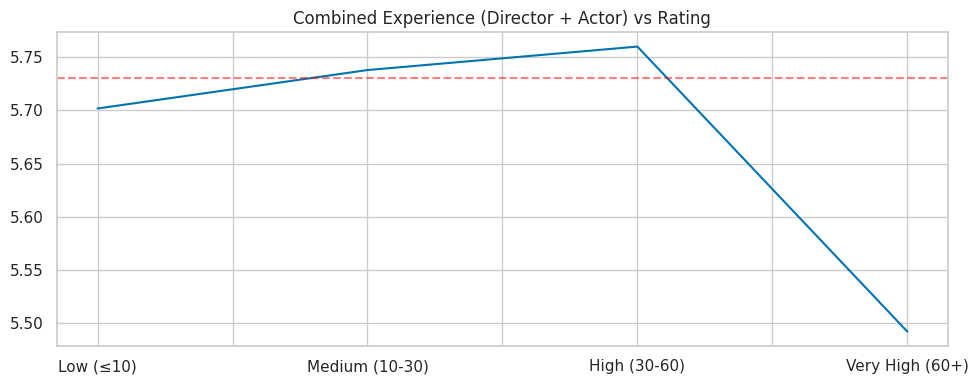

In [ ]:
# Plot
combined_avg['mean'].plot(figsize=(10, 4))
plt.title('Combined Experience (Director + Actor) vs Rating')
plt.xlabel('')
plt.axhline(y=df['averageRating'].mean(), color='red', linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Combined Experience Results:**

The combined experience pattern is clean and easy to interpret:
- **Low (≤10)**: mean rating ≈ 5.70 (37,803 movies)
- **Medium (10–30)**: mean rating ≈ 5.74 (8,945 movies)
- **High (30–60)**: mean rating ≈ 5.76 (1,922 movies)
- **Very High (60+)**: mean rating ≈ 5.49 (473 movies)

This tells us that:
1. Ratings increase steadily from Low → Medium → High combined experience.  
2. The **Very High (60+) category drops noticeably**, breaking the monotonic trend.  
3. The top-performing group is **High (30–60)**, not the most experienced one.  

**Conclusion on Combined Experience:**  
Combined experience (director + actor) does matter, but not in a straightforward upward pattern. Movies with **moderate to high combined experience (10–60)** perform best, while extremely high combined experience (**60+**) is associated with a significant drop in ratings. This suggests that team experience helps up to a point, but excessive combined experience may reflect less selective or lower-impact collaborations.

**Next question:** But does it matter if the same director-actor pair works together multiple times? Do repeated collaborations lead to even better results through familiarity and chemistry? Let's investigate that next.

## **7. Director-Actor Multiple Collaborations**

**Question:** Do directors and actors who work together repeatedly produce better movies?

Think about famous collaborations like Christopher Nolan-Christian Bale. Does repeated pairings lead to better chemistry and higher-rated films?

Our approach:
1. Create unique director-actor pair IDs for each movie
2. Count how many times each pair appears in our dataset
3. Compare the ratings of movies from **frequent collaborations (3+ movies)** vs **one-time or rare collaborations (1-2 movies)**


In [ ]:
# Create director-actor pairs
movies_df['first_director'] = movies_df['directors'].str.split(',').str[0]

# create collaboration pairs
movies_df['collaboration'] = movies_df['first_director'] + ' + ' + movies_df['lead_actor_id']

# Find collaborations that happened multiple times (at least 3 movies)
collab_stats = movies_df.groupby('collaboration')['averageRating'].agg(['mean', 'count']).reset_index()
collab_stats = collab_stats[collab_stats['count'] >= 3].sort_values('mean', ascending=False)

print(f"Found {len(collab_stats)} director-actor pairs with 3+ collaborations")
print(f"\nTop 10 collaborations:")
print(collab_stats.head(10))

Found 1007 director-actor pairs with 3+ collaborations

Top 10 collaborations:
               collaboration      mean  count
56338  nm3413454 + nm0004660  8.533333      3
1647   nm0004417 + nm0004417  8.450000      4
27978  nm0644183 + nm0541250  8.300000      3
28660  nm0660537 + nm0617378  8.233333      3
62412  nm6157331 + nm6157331  8.220000      5
41186  nm1031494 + nm0474907  8.166667      3
62774  nm6458915 + nm4741033  8.133333      3
28619  nm0659849 + nm0304262  8.050000      4
37642  nm0890499 + nm0331545  8.033333      3
38052  nm0899649 + nm0158112  7.966667      3


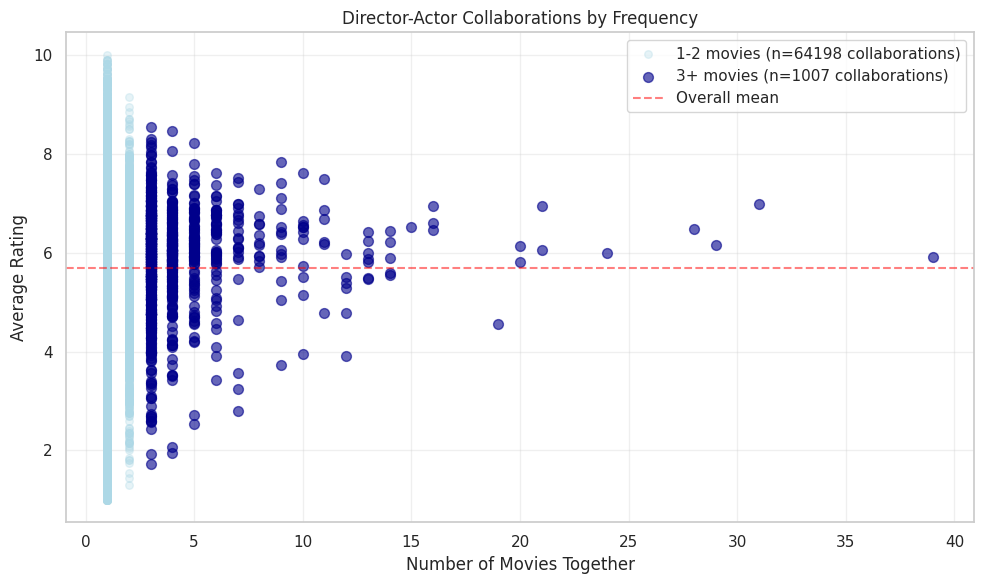

In [ ]:
# Create collaboration-level data and categorize movies
all_collabs = movies_df.groupby('collaboration')['averageRating'].agg(['mean', 'count']).reset_index()

# Separate collaborations by frequency
frequent_collabs = all_collabs[all_collabs['count'] >= 3]
infrequent_collabs = all_collabs[all_collabs['count'] < 3]

# Also categorize at movie level for next cell
movies_df['collab_frequency'] = movies_df['collaboration'].map(movies_df['collaboration'].value_counts())
movies_df['collab_type'] = movies_df['collab_frequency'].apply(lambda x: 'Multiple (3+)' if x >= 3 else 'One-time (1-2)')

# Scatter plot - collaboration level
plt.figure(figsize=(10, 6))
plt.scatter(infrequent_collabs['count'], infrequent_collabs['mean'], alpha=0.3, s=30,
            color='lightblue', label=f'1-2 movies (n={len(infrequent_collabs)} collaborations)')
plt.scatter(frequent_collabs['count'], frequent_collabs['mean'], alpha=0.6, s=50,
            color='darkblue', label=f'3+ movies (n={len(frequent_collabs)} collaborations)')
plt.xlabel('Number of Movies Together')
plt.ylabel('Average Rating')
plt.title('Director-Actor Collaborations by Frequency')
plt.axhline(y=movies_df['averageRating'].mean(), color='red', linestyle='--', alpha=0.5, label='Overall mean')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



**Director–Actor Collaboration Findings:**

The scatter plot gives a clear overview of collaboration patterns:
- **1–2 movie collaborations** (light blue) create a dense cluster covering a very wide rating range, suggesting these partnerships are too small or inconsistent to show stable performance.
- **3+ movie collaborations** (dark blue) are fewer in number but tend to cluster at **higher average ratings**, especially once the collaboration reaches **6+ movies together**.
- The **overall mean rating (~5.68)** sits in the middle of the one-time collaborations, while **most repeated collaborations lie above this line**.

This tells us that:
1. Occasional director–actor pairings show **high variability**, with outcomes ranging from very low to very high ratings.  
2. Repeated partnerships (3+ movies) tend to yield **more consistently positive results**, with many collaborations outperforming the global average.  
3. Long-term director–actor pairs (more than 6 movies together) show a noticeable **upward clustering**, indicating stronger working chemistry or successful creative alignment.

**Conclusion on Collaborations:**  
Director–actor pairs that collaborate repeatedly tend to produce **higher-rated films**. While one-off partnerships are unpredictable, consistent collaborations (especially 3+ movies) show a clear trend toward better-than-average performance.

This visual suggests that repeated collaborations DO tend to produce better-rated movies. But let's get specific numbers - what's the actual difference at the movie level?

Movie-level comparison:
                    mean  count
collab_type                    
Multiple (3+)   5.945852   4364
One-time (1-2)  5.660972  66967


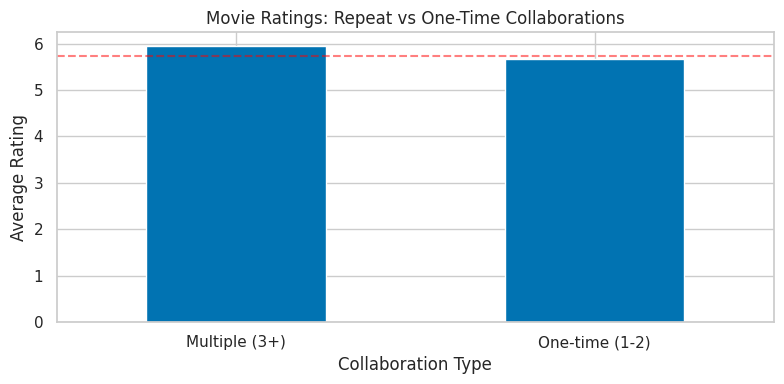

In [ ]:
# Compare average ratings at movie level
collab_comparison = movies_df.groupby('collab_type')['averageRating'].agg(['mean', 'count'])
print("Movie-level comparison:")
print(collab_comparison)

# Plot
collab_comparison['mean'].plot(kind='bar', figsize=(8, 4))
plt.ylabel('Average Rating')
plt.title('Movie Ratings: Repeat vs One-Time Collaborations')
plt.xlabel('Collaboration Type')
plt.xticks(rotation=0)
plt.axhline(y=df['averageRating'].mean(), color='red', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


**Movie-Level Comparison Results:**

This is interesting:
- **Movies from repeat collaborations (3+)**: 5.95 average rating (4,364 movies)
- **Movies from one-time collaborations (1–2)**: 5.66 average rating (66,967 movies)

This tells us that:
1. Movies made by director–actor pairs with **3+ collaborations** perform noticeably better on average.  
2. The difference is fairly large: **about 0.29 rating points**.  
3. The sample size for repeat collaborations is strong enough (4,364 movies) to make this pattern meaningful.

**Conclusion on Collaboration Frequency:**  
Repeat collaborations deliver **higher-rated films** on average, and the bar plot shows these movies sitting clearly above the overall mean. The next step is to test whether this difference is statistically significant.


In [ ]:
# Statistical test
group1 = movies_df[movies_df['collab_type']=='Multiple (3+)']['averageRating'].dropna()
group2 = movies_df[movies_df['collab_type']=='One-time (1-2)']['averageRating'].dropna()

from scipy.stats import ttest_ind
t, p = ttest_ind(group1, group2)
print(f"\nT-test: t={t:.2f}, p={p:.4f}")
print("Significant difference" if p < 0.05 else "No significant difference")


T-test: t=14.58, p=0.0000
Significant difference


**Statistical Confirmation:**

The t-test gives us **t = 14.58, p ≈ 0.0000** — this is **highly significant**.

This tells us that:
1. The difference in ratings between repeat collaborations (3+) and one-time collaborations is **not due to random variation**.  
2. Movies from repeat director–actor pairs are **genuinely rated higher**.  
3. The 0.29-point gap we observed in the bar plot is both **large** and **statistically reliable**.

**Why might this be?**
1. **Chemistry and trust**: Repeated partnerships build a shared working style that improves performance.  
2. **Efficiency**: Familiar teams communicate better and can focus more on creative execution.  
3. **Selection bias**: Successful collaborations are more likely to continue — strong pairs stick together.  
4. **Specialization**: Directors learn how to best utilize specific actors, improving outcomes over time.

**Conclusion:**  
When a director and actor repeatedly collaborate, the partnership tends to produce **consistently higher-rated films**. Frequent collaborations reflect a productive creative relationship that translates into better audience reception.


# ***Milestone 3***


## **Before We Start: Things we've modified from Milestone 2**

* In Milestone 2, we calculated each director's/actor's total career film count. This means a director who made 50 films total gets credited with "50 films of experience" even on their very first movie. This is not the right calculation for our analysis. Therefore, we calculated experience as "number of films completed before a specific movie's release year", not total career count (As per the feedback).
* For runtime vs. rating visulatisation : To address the density issues in the scatterplot, we grouped runtime into meaningful intervals and visualized the distribution of IMDb ratings using a boxplot. This representation makes the relationship between runtime and rating much clearer.

## **Predictive Modeling for Movie Ratings**

### **Overview**

In Milestone 2, we explored relationships between movie ratings and various factors (genre, runtime, director experience, actor experience, director/actor chemistry). Now, in Milestone 3, we will build **predictive models** to answer:

**Research Question:** Which variables best predict a movie's IMDb ratings among genre, runtime, director experiece, actor experience or the director/actor chemistry, and by how much?

### **Addressing Professor's Feedback**

Based on feedback from Milestone 2, we will:

1. **Establish a baseline** - document the overall rating distribution as our reference point
2. **Address sparse data in early decades** - aggregate by decade and visualize sample distribution
4. **Build predictive models** - use multiple regression with proper controls (decade, genre dummies)
5. **Check assumptions** - test for multicollinearity, evaluate residuals
6. **Interpret practically** - explain what each coefficient means in real terms

### **Modeling Approach**

We will build and compare:
- **Multiple Linear Regression** with all features
- **Regularized Regression** (Ridge) to handle multicollinearity
- **Feature importance analysis** to identify key predictors


## **1. Baseline**

Before building predictive models, we need to understand our baseline - what is the overall distribution of ratings? This serves as our reference point for evaluating model performance.


In [ ]:
# Let's load the data first
import pandas as pd
#df = pd.read_csv("/content/drive/MyDrive/Fall 2025/ADS/Assignments/Group Project/movies_ratings_dirs_actors.csv")
df = pd.read_csv("/content/drive/MyDrive/Applied Data Science/Group Project/movies_ratings_dirs_actors.csv")
df.head()

tconst                 primaryTitle  runtimeMinutes  \
0  tt0000009                   Miss Jerry              45   
1  tt0127962             The Passion Play              45   
2  tt0000574  The Story of the Kelly Gang              70   
3  tt0191323        Defense of Sevastopol             100   
4  tt0128954            Balletdanserinden              45   

                       genres  startYear  averageRating            directors  \
0                     Romance       1894            5.3            nm0085156   
1             Biography,Drama       1903            6.5  nm0634629,nm0954087   
2  Action,Adventure,Biography       1906            6.0            nm0846879   
3                 History,War       1911            5.8  nm0327201,nm0151946   
4                       Drama       1911            5.5            nm0088881   

   max_director_experience lead_actor_id  lead_actor_experience  
0                        0     nm0063086                      0  
1                        0     nm1166468                      0  
2                        0     nm0846887                      0  
3                        0     nm0343043                      0  
4                        0     nm0082349                      0

BASELINE STATISTICS FOR IMDb RATINGS

Dataset size: 71,331 movies

Rating distribution:
  Mean:     5.678400695349847
  Median:   5.9
  Std Dev:  1.2525265756918307
  Min:      1.0
  Max:      10.0
  25th %:   4.9
  75th %:   6.5
  IQR:      1.5999999999999996


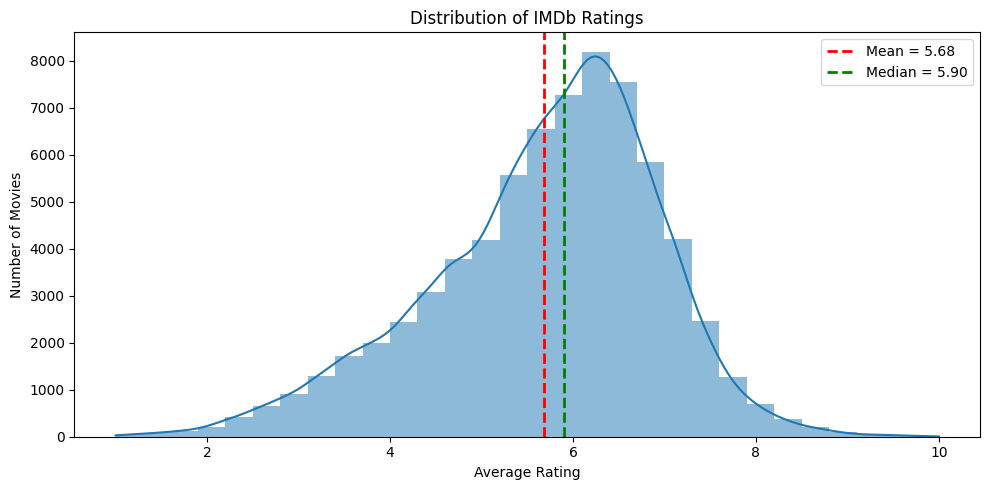

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Work with ratings column
ratings = df["averageRating"]

# Basic stats
print("BASELINE STATISTICS FOR IMDb RATINGS")

desc = ratings.describe()
iqr = desc["75%"] - desc["25%"]

print(f"\nDataset size: {len(ratings):,} movies")
print("\nRating distribution:")
print(f"  Mean:     {desc['mean']}")
print(f"  Median:   {desc['50%']}")
print(f"  Std Dev:  {desc['std']}")
print(f"  Min:      {desc['min']}")
print(f"  Max:      {desc['max']}")
print(f"  25th %:   {desc['25%']}")
print(f"  75th %:   {desc['75%']}")
print(f"  IQR:      {iqr}")

# Plot distribution
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(ratings, bins=30, kde=True, ax=ax, edgecolor=None)

mean_rating = desc["mean"]
median_rating = desc["50%"]

ax.axvline(mean_rating, color="red", linestyle="--", linewidth=2,
           label=f"Mean = {mean_rating:.2f}")
ax.axvline(median_rating, color="green", linestyle="--", linewidth=2,
           label=f"Median = {median_rating:.2f}")

ax.set_title("Distribution of IMDb Ratings")
ax.set_xlabel("Average Rating")
ax.set_ylabel("Number of Movies")
ax.legend()
ax.grid(False)

plt.tight_layout()
plt.show()


**Interpretation:**
Ratings range from 1 to 10, but about half of the movies fall between 4.9 and 6.5 stars, with an average of 5.68 and a median of 5.90. The distribution is slightly left-skewed, with a longer tail toward low ratings. As a baseline, a naive model that always predicts the mean rating (5.68) would serve as our benchmark, and our goal is to build models that significantly outperform this baseline.

## **2. Addressing Sparse Data in Early Decades**

Professor's feedback noted that strong correlations across years might be inflated by sparse data in earlier decades. Let's examine the distribution of movies across time to understand potential biases.


In [ ]:
# Convert year to numeric and create decade column
df_temporal = df.copy()
df_temporal["decade"] = (df_temporal["startYear"] // 10 * 10).astype(int)

# Stats per decade
decade_stats = (
    df_temporal
    .groupby("decade")
    .agg(
        num_movies=("tconst", "size"),
        avg_rating=("averageRating", "mean"),
        std_rating=("averageRating", "std")
    )
    .reset_index()
)

print("MOVIES PER DECADE")
print(decade_stats.to_string(index=False))

# find sparse decades that has less than 1000 movies
threshold = 1000
sparse_decades = decade_stats.loc[decade_stats["num_movies"] < threshold, "decade"].tolist()
print(f"\nSparse decades (< {threshold} movies): {sparse_decades}")

MOVIES PER DECADE
 decade  num_movies  avg_rating  std_rating
   1890           1    5.300000         NaN
   1900           2    6.250000    0.353553
   1910         213    6.197653    0.532477
   1920         604    6.387417    0.800958
   1930        2609    6.090609    0.639390
   1940        2527    6.184250    0.647864
   1950        3389    6.186279    0.775935
   1960        4200    6.094071    1.022612
   1970        5367    5.851165    1.119348
   1980        5944    5.811238    1.217800
   1990        6881    5.644209    1.224229
   2000       11942    5.528638    1.286282
   2010       21759    5.446928    1.349574
   2020        5893    5.505854    1.470000

Sparse decades (< 1000 movies): [1890, 1900, 1910, 1920]


**Finding:** The dataset is heavily concentrated in recent decades. From 1950 onward we have several thousand movies per decade, while 1890–1920 have very small samples (fewer than 1,000 titles each). These early decades are therefore statistically weak and more likely to suffer from selection bias (only well-known older films are present).

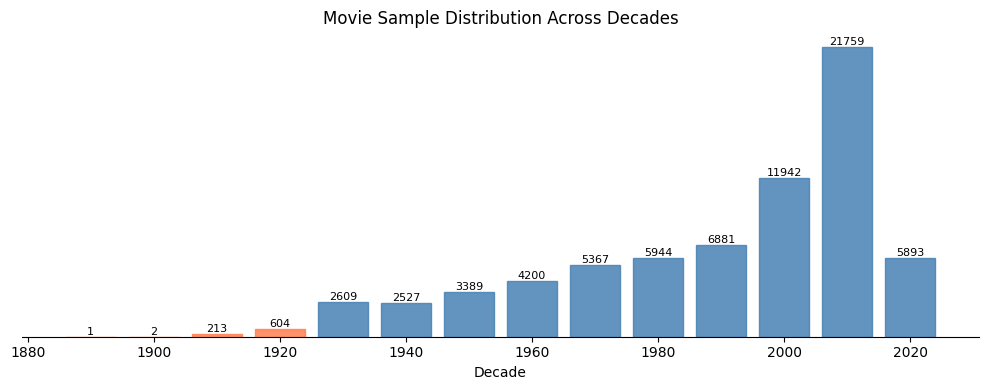

In [ ]:
# Bar chart of number of movies per decade
fig, ax = plt.subplots(figsize=(10, 4))

bars = ax.bar(decade_stats["decade"], decade_stats["num_movies"], width=8, alpha=0.85)

# Highlight sparse decades and add the counts
for bar, (decade, count) in zip(bars, zip(decade_stats["decade"], decade_stats["num_movies"])):
    bar.set_color("coral" if count < threshold else "steelblue")
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        count,
        str(count),
        ha="center",
        va="bottom",
        fontsize=8,
    )

ax.set_title("Movie Sample Distribution Across Decades")
ax.set_xlabel("Decade")

# simplify the graph
ax.yaxis.set_visible(False)
ax.grid(False)
for spine in ["left", "right", "top"]:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

The bar chart confirms that our sample is dominated by movies from the late 20th and early 21st century. Note: We don't have the full data from the year of 2020.

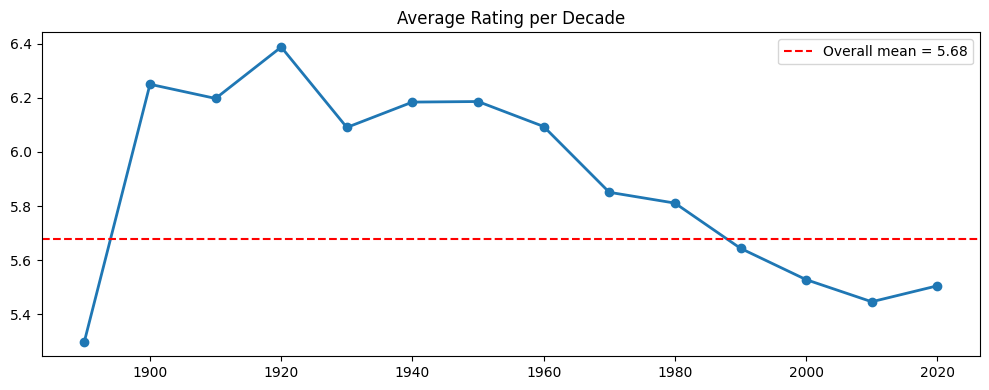

In [ ]:
# Line plot of average rating per decade
fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(
    decade_stats["decade"],
    decade_stats["avg_rating"],
    "o-",
    linewidth=2,
    markersize=6,
)

overall_mean = df["averageRating"].mean()
ax.axhline(
    overall_mean,
    linestyle="--",
    linewidth=1.5,
    color="red",
    label=f"Overall mean = {overall_mean:.2f}",
)

ax.set_title("Average Rating per Decade")
ax.grid(False)
ax.legend()

plt.tight_layout()
plt.show()


And since the earlier movies tend to have the lowest and the highest ratings, and are not stable at all, and their sample size is super small, we needed a solution for this data sparsity.

**Solution:** We included 'decade' as a categorical variable and will use it in our regression model to control the temporal effects.

## **3. Feature Engineering for Regression Model**

Now we'll prepare all features for our predictive model:

1. **Continuous variables:** runtime, director_experience, actor_experience
2. **Categorical variables (dummies):** **genre**(extracts the first listed genre and limits categories to the top 20, grouping all others as “Other” to reduce noise.), **decade**(groups films into 10-year periods to capture broad temporal trends.)
3. **Combined experience:** director + actor (addressing collaboration hypothesis) -- to measure total industry experience involved in a movie.
4. **Experience interaction**: multiplies director and actor experience to capture possible chemistry or synergy effects.


In [ ]:
# Add decade variable
df['decade'] = (df['startYear'] // 10 * 10).astype(int)

# Add genre primary variable
# Extract primary genre aka first listed
df['primary_genre'] = df['genres'].str.split(',').str[0].str.strip()

# keep top 20 most frequent ones and name others 'other'
genre_counts = df['primary_genre'].value_counts()
top_genres = genre_counts.head(20).index.tolist()
df['genre_category'] = df['primary_genre'].apply(
    lambda x: x if x in top_genres else 'Other'
)

# Combined experience (addresses collaboration hypothesis)
df['combined_experience'] = df['max_director_experience'] + df['lead_actor_experience']
# Instead of the addition, we'll also use mltiplicative experience interaction now(director-actor synergy/chemistry)
df['exp_interaction'] = df['max_director_experience'] * df['lead_actor_experience']

Why? :
1. Using **decades** instead of raw release years reduces granularity while still capturing long-term rating patterns.  
2. Restricting genres to the **20 most common categories** avoids creating too many sparse dummy variables.  
3. The **combined_experience** feature reflects the idea that more experienced teams might produce better movies.  
4. The **exp_interaction** term checks whether a highly experienced director paired with a highly experienced actor produces disproportionately strong results - a synergy effect rather than just additive experience.

**Conclusion:**  
These engineered features help the regression model capture meaningful temporal, genre-based, and collaboration-based patterns in IMDb ratings, while keeping the feature set interpretable and statistically manageable.

In [ ]:
# more advanced feature eng

# Log-transformed experience
# Using log1p to handle zero values
df['log_director_exp'] = np.log1p(df['max_director_experience'])
df['log_actor_exp'] = np.log1p(df['lead_actor_experience'])

# Runtime-Genre Interaction (some genres benefit from longer runtimes)
# key_genres = ['Drama', 'Comedy', 'Action', 'Horror', 'Documentary']
for genre in top_genres:
    col_name = f'runtime_x_{genre.lower()}'
    df[col_name] = df['runtimeMinutes'] * (df['primary_genre'] == genre).astype(int)


What we added here is:

1. **Log-transformed experience variables**: Experience likely has diminishing returns, going from 0 to 10 films matters much more than going from 50 to 60 films. The logarithmic transformation captures this non-linear effect, where early experience gains have larger impacts on ratings than later ones.

3. **Runtime-genre interactions**: Different genres have different optimal runtime ranges. A 150-minute drama (e.g., The Godfather) might be compelling, but a 150-minute comedy could lose audience interest. These interaction terms allow the model to learn genre-specific runtime effects, capturing the idea that runtime's impact depends on the type of movie.


In [ ]:
df

tconst                 primaryTitle  runtimeMinutes  \
0       tt0000009                   Miss Jerry              45   
1       tt0127962             The Passion Play              45   
2       tt0000574  The Story of the Kelly Gang              70   
3       tt0191323        Defense of Sevastopol             100   
4       tt0128954            Balletdanserinden              45   
...           ...                          ...             ...   
71326  tt10481990             Rabia and Olivia              86   
71327  tt14926914               Bermuda Island              85   
71328  tt16964616             Orchestra Mysuru             174   
71329  tt23782446                 Fijn weekend              89   
71330  tt15169774                Doctor Bakshi             108   

                           genres  startYear  averageRating  \
0                         Romance       1894            5.3   
1                 Biography,Drama       1903            6.5   
2      Action,Adventure,Biography       1906            6.0   
3                     History,War       1911            5.8   
4                           Drama       1911            5.5   
...                           ...        ...            ...   
71326                Drama,Family       2023            8.9   
71327      Action,Adventure,Drama       2023            5.6   
71328               Drama,Musical       2023            8.2   
71329                      Comedy       2023            6.3   
71330      Crime,Mystery,Thriller       2023            8.7   

                 directors  max_director_experience lead_actor_id  \
0                nm0085156                        0     nm0063086   
1      nm0634629,nm0954087                        0     nm1166468   
2                nm0846879                        0     nm0846887   
3      nm0327201,nm0151946                        0     nm0343043   
4                nm0088881                        0     nm0082349   
...                    ...                      ...           ...   
71326            nm3349777                        1     nm0149441   
71327            nm2245793                        0     nm0001744   
71328           nm13279192                        0     nm8955419   
71329            nm1670246                        3     nm2641272   
71330            nm4733676                        2     nm1913625   

       lead_actor_experience  ...  runtime_x_animation runtime_x_adult  \
0                          0  ...                    0               0   
1                          0  ...                    0               0   
2                          0  ...                    0               0   
3                          0  ...                    0               0   
4                          0  ...                    0               0   
...                      ...  ...                  ...             ...   
71326                      0  ...                    0               0   
71327                     23  ...                    0               0   
71328                      0  ...                    0               0   
71329                      0  ...                    0               0   
71330                      7  ...                    0               0   

      runtime_x_romance  runtime_x_family  runtime_x_mystery  \
0                    45                 0                  0   
1                     0                 0                  0   
2                     0                 0                  0   
3                     0                 0                  0   
4                     0                 0                  0   
...                 ...               ...                ...   
71326                 0                 0                  0   
71327                 0                 0                  0   
71328                 0                 0                  0   
71329                 0                 0                  0   
71330                 0                

Next, we need to convert the categorical variables into a numeric form that can be used by regression models. Therefore, we'll use dummy variables (using one-hot-encding) to represent the categorical variables using 0 and 1.

**How it works:**
- Original: A movie has `genre = "Drama"`
- After encoding: `genre_Drama = 1`, `genre_Comedy = 0`, `genre_Action = 0`, ...

In [ ]:


# Create dummy variables for the genre category
genre_dummies = pd.get_dummies(df['genre_category'], prefix='genre', drop_first=True, dtype=int )

# Create decade dummies
# Group sparse decades ( movies before 1980) into broader categories to avoid overfitting
def categorize_decade(year):
    if year < 1960:
        return 'pre_1960'
    elif year < 1980:
        return '1960s_1970s'
    elif year < 2000:
        return '1980s_1990s'
    elif year < 2010:
        return '2000s'
    else:
        return '2010s_2020s'

df['decade_category'] = df['decade'].apply(categorize_decade)
decade_dummies = pd.get_dummies(df['decade_category'], prefix='decade', drop_first=True, dtype=int)

# # dataset of continuous variables
# feature_cols = ['runtimeMinutes', 'max_director_experience', 'lead_actor_experience', 'combined_experience']

# dataset of continuous variables (including new engineered features)
# Base features
base_features = [
    'runtimeMinutes',
    # 'max_director_experience',
    # 'lead_actor_experience',
    'combined_experience',
    'log_director_exp',
    'log_actor_exp',
    'exp_interaction'
]

# Add runtime-genre interactions for all top genres
runtime_interactions = [f'runtime_x_{genre.lower()}' for genre in top_genres]

# Combine all continuous features
feature_cols = base_features + runtime_interactions


X_continuous = df[feature_cols].copy()

# Combine all features
X_all = pd.concat([X_continuous, genre_dummies, decade_dummies], axis=1)
y = df['averageRating'].copy()

print(f'feature shape: {X_all.shape}')
print(f'target shape: {y.shape}')
X_all

feature shape: (71331, 49)
target shape: (71331,)


runtimeMinutes  combined_experience  log_director_exp  log_actor_exp  \
0                  45                    0          0.000000       0.000000   
1                  45                    0          0.000000       0.000000   
2                  70                    0          0.000000       0.000000   
3                 100                    0          0.000000       0.000000   
4                  45                    0          0.000000       0.000000   
...               ...                  ...               ...            ...   
71326              86                    1          0.693147       0.000000   
71327              85                   23          0.000000       3.178054   
71328             174                    0          0.000000       0.000000   
71329              89                    3          1.386294       0.000000   
71330             108                    9          1.098612       2.079442   

       exp_interaction  runtime_x_drama  runtime_x_comedy  runtime_x_action  \
0                    0                0                 0                 0   
1                    0                0                 0                 0   
2                    0                0                 0                70   
3                    0                0                 0                 0   
4                    0               45                 0                 0   
...                ...              ...               ...               ...   
71326                0               86                 0                 0   
71327                0                0                 0                85   
71328                0              174                 0                 0   
71329                0                0                89                 0   
71330               14                0                 0                 0   

       runtime_x_crime  runtime_x_horror  ...  genre_Other  genre_Romance  \
0                    0                 0  ...            0              1   
1                    0                 0  ...            0              0   
2                    0                 0  ...            0              0   
3                    0                 0  ...            0              0   
4                    0                 0  ...            0              0   
...                ...               ...  ...          ...            ...   
71326                0                 0  ...            0              0   
71327                0                 0  ...            0              0   
71328                0                 0  ...            0              0   
71329                0                 0  ...            0              0   
71330              108                 0  ...            0              0   

       genre_Sci-Fi  genre_Thriller  genre_War  genre_Western  \
0                 0               0          0              0   
1                 0               0          0              0   
2                 0               0          0              0   
3                 0               0          0              0   
4                 0               0          0              0   
...             ...             ...        ...            ...   
71326             0               0          0              0   
71327             0               0          0              0   
71328             0               0          0              0   
71329             0               0          0              0   
71330             0               0          0              0   

       decade_1980s_1990s  decade_2000s  decade_2010s_2020s  decade_pre_1960  
0                       0             0                   0                1  
1                       0             0                   0                1  
2                       0             0                   0                1  
3                       0             0                   0                1  
4       

**One-Hot Encoding + Final Feature Assembly**

This step converts all categorical variables into numerical form and builds the full feature matrix for regression:
- **Genre dummies**: each genre becomes a 0/1 column.
- **Decade dummies**: release years are grouped into broader decade categories and converted into dummy variables.
- **Continuous features**: includes runtime, experience measures, log-transformed experience, and runtime × genre interactions.

Why? :
1. Regression models require **numerical inputs**, so genre and decade must be converted into dummy variables.  
2. Grouping decades (e.g., *pre-1960*, *1960s-1970s*) prevents overfitting by avoiding many sparse categories.  
3. Interaction features and transformed experience variables are kept in their **continuous** form to preserve useful variation.  
4. Combining all features using `pd.concat` creates a complete dataset for modeling, with **49 predictors** and **71k observations**.

**Conclusion:**  
This encoding and feature assembly step produces a clean, fully numerical feature matrix (`X_all`) and target vector (`y`) that are ready for scaling and regression. It ensures the model can learn from genre, time period, runtime effects, and advanced experience-based interactions.


In [ ]:
print("Feature summary for regression model")
print("=" * 40)
print(f"\nTotal rows: {len(X_all):,}")
print(f"\nContinuous Features ({len(feature_cols)}):")
print(feature_cols)

print(f"\nGenre Dummies ({len(genre_dummies.columns)}):")
print(genre_dummies.columns)

print(f"\nDecade Dummies ({len(decade_dummies.columns)}):")
print(decade_dummies.columns)

print(f"\nTotal Features: {X_all.shape[1]}")

Feature summary for regression model

Total rows: 71,331

Continuous Features (25):
['runtimeMinutes', 'combined_experience', 'log_director_exp', 'log_actor_exp', 'exp_interaction', 'runtime_x_drama', 'runtime_x_comedy', 'runtime_x_action', 'runtime_x_crime', 'runtime_x_horror', 'runtime_x_adventure', 'runtime_x_documentary', 'runtime_x_biography', 'runtime_x_thriller', 'runtime_x_western', 'runtime_x_animation', 'runtime_x_adult', 'runtime_x_romance', 'runtime_x_family', 'runtime_x_mystery', 'runtime_x_fantasy', 'runtime_x_sci-fi', 'runtime_x_musical', 'runtime_x_history', 'runtime_x_war']

Genre Dummies (20):
Index(['genre_Adult', 'genre_Adventure', 'genre_Animation', 'genre_Biography',
       'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama',
       'genre_Family', 'genre_Fantasy', 'genre_History', 'genre_Horror',
       'genre_Musical', 'genre_Mystery', 'genre_Other', 'genre_Romance',
       'genre_Sci-Fi', 'genre_Thriller', 'genre_War', 'genre_Western'],
      dtyp

**Feature Summary for Regression Model:**

This summary shows the full structure of the dataset used for modeling:
- **71,331 total rows** after cleaning and filtering.
- **25 continuous features**, including runtime, experience measures, log-transformed experience, interaction terms, and runtime–genre interactions.
- **20 genre dummy variables**, representing the most common genres plus “Other”.
- **4 decade dummy variables**, capturing broad release-period effects without overfitting.
- **49 total input features** used for the regression model.

This tells us that:
1. The model includes a balanced mix of continuous, categorical, and interaction features.  
2. Genre and decade are well-represented without creating too many sparse categories.  
3. Interaction terms greatly expand the model’s ability to learn nuanced relationships (e.g., runtime affecting different genres differently).  

**Conclusion:**  
The final feature matrix is comprehensive, well-structured, and optimized for regression. It captures genre, time period, runtime effects, experience levels, and collaboration dynamics in a clean 49-feature representation.


## **4. Regression Model**

Now, we'll build a comprehensive regression model that predicts IMDb ratings using all our features to test which variables best explain movie ratings.


In [ ]:
#installing required libs
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

**Explanation:**
- `train_test_split`: Splits data into training and testing sets
- `LinearRegression`: Standard OLS (Ordinary Least Squares) regression
- `Ridge`: Regularized regression models that handle multicollinearity
- `RidgeCV`: Automatically find the best regularization strength using cross-validation
- `StandardScaler`: Standardizes features (needed for Ridge)
- Metrics: `r2_score`, `mean_squared_error`, `mean_absolute_error` to evaluate model performance


**Split Data into Training and Testing Sets**


In [ ]:
# Split the data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_all,
    y,
    test_size=0.2,
    random_state=42
)

**Build Model 1: Multiple Linear Regression (OLS)**

This is our baseline model. Essentially, it determines coefficients that minimize the squared differences between the predicted and actual ratings.


In [ ]:
# Create the model
model_ols = LinearRegression()

# Train the model on training data
model_ols.fit(X_train, y_train)

# Make predictions on both training and testing sets
y_pred_train_ols = model_ols.predict(X_train)
y_pred_test_ols = model_ols.predict(X_test)

#Calculate performance metrics
train_r2_ols = r2_score(y_train, y_pred_train_ols)
test_r2_ols = r2_score(y_test, y_pred_test_ols)
test_rmse_ols = np.sqrt(mean_squared_error(y_test, y_pred_test_ols))
test_mae_ols = mean_absolute_error(y_test, y_pred_test_ols)

In [ ]:
# Print results
print("LINEAR REGRESSION RESULTS")

print(f"\nR²:")
print(f"  Train: {train_r2_ols}")
print(f"  Test:  {test_r2_ols}")

gap = train_r2_ols - test_r2_ols
print(f"Train–test R² gap: {gap}")
print("Model generalizes well.")


print(f"\nErrors (on test set):")
print(f"  RMSE: {test_rmse_ols}")
print(f"  MAE:  {test_mae_ols}")

LINEAR REGRESSION RESULTS

R²:
  Train: 0.2575925955771522
  Test:  0.2639581579500059
Train–test R² gap: -0.006365562372853684
Model generalizes well.

Errors (on test set):
  RMSE: 1.0705161991831347
  MAE:  0.8295613073868661


**Interpreting the Results:**

- R², It represents the percentage of the variance in the dependent variable that is predictable from the independent variable(s). For us R² = 0.26 means we explain 26% of the variance (rest is due to factors/data we didn't consider)
  
- RMSE (Root Mean Squared Error) = 1.07 means the typical prediction is off by 1 stars
  
- MAE (Mean Absolute Error) = 0.83 means the average error is 0.83 stars


### **Check for Multicollinearity Among Predictors (VIF Analysis)**

VIF (Variance Inflation Factor) tells us if features are too correlated with each other:
- VIF < 5: Good
- VIF 5-10: Moderate
- VIF > 10: High (need Ridge/Lasso)


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for continuous variables only
# continuous_features = ['runtimeMinutes', 'max_director_experience', 'lead_actor_experience', 'combined_experience']
continuous_features = feature_cols.copy()
X_cont = X_all[continuous_features]

vif_data = pd.DataFrame()
vif_data["Feature"] = continuous_features
vif_data["VIF"] = [variance_inflation_factor(X_cont.values, i) for i in range(len(continuous_features))]

print("Multicollinearity Check")

for idx, row in vif_data.iterrows():
    if row['VIF'] > 10:
        status = "High"
    elif row['VIF'] > 5:
        status = "Moderate"
    else:
        status = "Good"
    print(f"{row['Feature']:35s}  VIF = {row['VIF']:>8.2f}  {status}")

/usr/local/lib/python3.12/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


Multicollinearity Check
runtimeMinutes                       VIF =   741.55  High
combined_experience                  VIF =      inf  High
log_director_exp                     VIF =     2.13  Good
log_actor_exp                        VIF =     2.04  Good
exp_interaction                      VIF =      inf  High
runtime_x_drama                      VIF =   245.46  High
runtime_x_comedy                     VIF =   197.42  High
runtime_x_action                     VIF =   100.61  High
runtime_x_crime                      VIF =    42.83  High
runtime_x_horror                     VIF =    33.92  High
runtime_x_adventure                  VIF =    31.40  High
runtime_x_documentary                VIF =    18.80  High
runtime_x_biography                  VIF =    17.72  High
runtime_x_thriller                   VIF =    14.88  High
runtime_x_western                    VIF =     7.02  Moderate
runtime_x_animation                  VIF =     6.44  Moderate
runtime_x_adult                      VIF

`combined_experience` have high VIF (>10) because it equals director_exp + actor_exp. This creates perfect correlation by design. Ridge regression handles this automatically. The other high VIF score is also for the same resons, sice they are derived from other independent variables.


### Build Model 2: Ridge Regression

We'll build this regularized regression model that handles multicollinearity well, and we'll use `RidgeCV`, which automatically finds the best penalty strength (α) using cross-validation.


In [ ]:
# Standardize features by scaling and
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Ridge model with cross-validation
alphas = np.logspace(-3, 3, 50)  #50 values from 0.001 to 1000
model_ridge = RidgeCV(alphas=alphas, cv=5, scoring='r2')

# Train the model
model_ridge.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train_ridge = model_ridge.predict(X_train_scaled)
y_pred_test_ridge = model_ridge.predict(X_test_scaled)

# Calculate metrics
train_r2_ridge = r2_score(y_train, y_pred_train_ridge)
test_r2_ridge = r2_score(y_test, y_pred_test_ridge)
train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_pred_train_ridge))
test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_test_ridge))
test_mae_ridge = mean_absolute_error(y_test, y_pred_test_ridge)

In [ ]:
# Print results
print("RIDGE REGRESSION RESULTS")
print(f"\nBest alpha: {model_ridge.alpha_}")

print(f"\nR² Score:")
print(f"  Training:   {train_r2_ridge}")
print(f"  Testing:    {test_r2_ridge})")
print(f"  Difference: {abs(train_r2_ridge - test_r2_ridge)}")

print(f"\nErrors (on test set):")
print(f"  RMSE: {test_rmse_ridge:.3f}")
print(f"  MAE:  {test_mae_ridge:.3f}")

RIDGE REGRESSION RESULTS

Best alpha: 79.06043210907701

R² Score:
  Training:   0.2575613731098948
  Testing:    0.2639049054781918)
  Difference: 0.006343532368296989

Errors (on test set):
  RMSE: 1.071
  MAE:  0.830


So, both the results of the OLS multiple regression model and the ridge regression model are giving the same results. Therefore, we'll be using OLS from now on to interpret feature importance, because it's coefficients are easier to interpret than standardized Ridge coefficients.


### **Predicted vs Actual Ratings (OLS)**

Let's visualize how well our Ridge model predicts ratings.


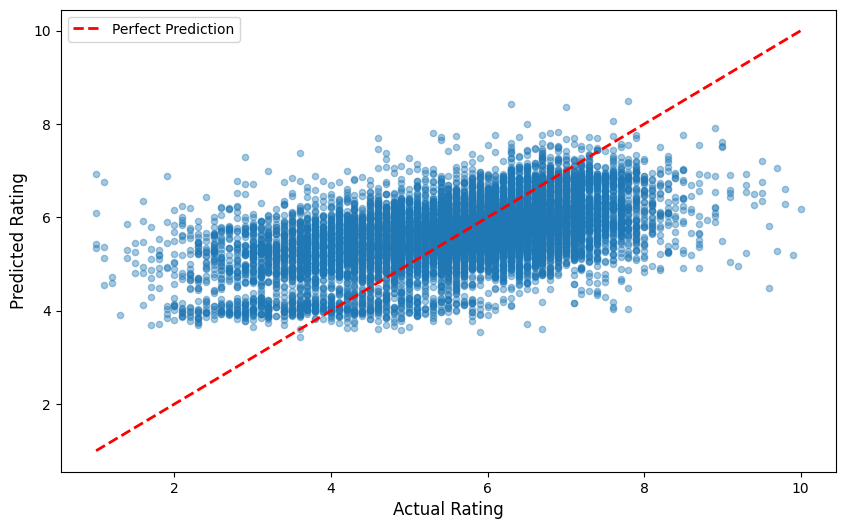

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(y_test, y_pred_test_ols, alpha=0.4, s=20)

# Perfect prediction line
min_val = min(y_test.min(), y_pred_test_ridge.min())
max_val = max(y_test.max(), y_pred_test_ridge.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

plt.xlabel('Actual Rating', fontsize=12)
plt.ylabel('Predicted Rating', fontsize=12)
plt.legend()
plt.grid(False)

### **Feature Importance: What Actually Matters?**

Let's examine which features have the biggest impact on ratings by looking at coefficients from OLS

In [ ]:
# Get coefficients from OLS model
feature_names = X_train.columns
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model_ols.coef_
})

# Sort by absolute value
coefficients_df['Abs_Coef'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values('Abs_Coef', ascending=False)

print("Features by Importance\n")
print("(+) = increases rating  and (-) = decreases rating\n")

for i, row in coefficients_df.head(50).iterrows():
    print(f"{row['Feature']:40s} {row['Coefficient']:>8.4f}")


Features by Importance

(+) = increases rating  and (-) = decreases rating

genre_Documentary                          2.4352
genre_Biography                            1.8672
genre_Animation                            1.5689
genre_Thriller                            -1.3018
genre_Horror                              -1.0798
genre_Fantasy                             -1.0267
genre_Adult                                0.9331
genre_Other                                0.9094
genre_Western                              0.8797
genre_History                              0.7220
genre_Romance                              0.6544
decade_2010s_2020s                        -0.5903
genre_Sci-Fi                              -0.5702
genre_Drama                                0.5658
decade_2000s                              -0.5636
genre_Musical                             -0.5618
decade_pre_1960                            0.3567
decade_1980s_1990s                        -0.2907
genre_Family            

### **Answering the Research Question**

**Research Question:** What factors (among genre, runtime, director experience, actor experience, or the director/actor chemistry) contribute to a movie's IMDb rating among moderately popular films (100-1000 votes)?

Our investigation reveals the following findings:

### **What Actually Matters?**

**Genre dominates everything else.** The difference between the highest-rated genre (Documentary, +2.44 points) and lowest-rated (Thriller, -1.30 points) is 3.7 rating points. That's enormous. Biography (+1.87) and Animation (+1.57) also rate significantly higher, while Horror (-1.08) and Fantasy (-1.03) struggle alongside Thriller.

**Time period has a large effect too.** Older movies rate higher (pre-1960: +0.36) while modern films face penalties (2010s-2020s: -0.59). This is classic survivorship bias, where only good old movies remain well-known, while we rate all recent films both good and bad.

**Runtime matters, but it also depends on the genre.** Our runtime-genre interactions show that longer films help some genres but hurt others. Thrillers and musicals benefit from extra time (+0.014 and +0.012 per minute), while westerns and biographies rate worse when they are longer (-0.008 and -0.005 per minute). A 150-minute thriller can rate nearly a full star higher than a 90-minute one, but the opposite is true for westerns.

**And here's the surprise: experience barely matters.** Even after using log transformations, director experience (-0.057) and actor experience (-0.046) have near-to-zero effects. A director with 10 prior films doesn't rate significantly better than a newcomer. Either experienced directors take on riskier projects, or audiences simply don't care about credentials as much as we'd expect.

**Director-actor collaboration is too subtle to detect.** We tested both additive and multiplicative interactions between director and actor experience, but multicollinearity might have made it impossible to isolate a clear effect.

### **Overall What the Model Tells Us?**

Our model explains 26% of rating variance. The remaining 74% comes from things we didn't consider and things that sometimes can't be measured, for instance, script quality, performances, cinematography, music, or marketing. This might be good sign that ratings actually depend on movie quality, not just predictable formulas.

**For filmmakers:** Genre choice matters most. If the story fits, Documentary or Biography will rate higher than Thriller or Horror. Matching runtime to genre expectations (longer for thrillers, shorter for westerns) is a game-changer. And worring too much about hiring the most experienced or overhyped people should be the least of the priorities.